# Milstone 2


## 1 Perkenalan


Nama: DESTI RATNA KOMALA

Batch : (RMT-020)

Dataset : Airline Customer Satisfaction

### Judul


**"Pemodelan Classification menggunakan algoritma supervised learning untuk memprediksi apakah pelanggan pesawat terbang puas atau tidak dengan pelayanan yang diberikan"**





### *Dataset* Information

Dataset ini berisi informasi mengenai:
- **kepuasaan pelanggan** (*satisfaction*)
- **faktor demografik** (*Gender, Age*),
- **waktu**(*Departure Delay in Minutes, Arrival Delay in Minutes, Departure/Arrival time convenient),
- **pelayanan**(Food and drink, Gate location, Inflight wifi service, Inflight entertainment, Online support, Ease of Online booking, On-board service, Leg room service,Baggage handling, Checkin service, Cleanliness, Online boarding, Seat comfort, Class, Customer, Type, Type of Travel, Flight Distance*)

Kepuasan pelanggan atau *Satisfaction* adalah status yang diberikan oleh penumpang maskapai penerbangan yang terdiri dari **tidak puas (0: dissatisfied** dan **puas (1:satisfied)**. jika penumpang memberikan nilai 0, maka, perlu adanya perubahan yang signifikan pada kualitas pelayanan maskapai tersebut.

### Objective




Sebuah maskapai penerbangan ingin meningkatkan kualitas pelayanan untuk meningkatkan jumlah penumpang dan mempromosikan jasa penerbangan ke ranah yang lebih besar. Namun, perusahaan tersebut kesulitan untuk memfokuskan pelayanan mana yang harus ditingkatkan untuk mencapai hal tersebut. Oleh karena itu, dibutuhkan pemodelan prediksi kepuasan penumpang maskapai penerbangan, untuk mengetahui apakah pelayanan yang telah diberikan kepada penumpang sudah baik atau ada yang harus ditingkatkan lagi. Pemodelan Logistic Regression, KKN, Decision tree, Random Forest dan SVC digunakan guna mendapatkan hasil prediksi dengan recall dan tingkat akurasi diatas 80%.

## 2 Import Libraries

Berikut adalah keseluruhan libraries yang digunakan pada analisis dataset ini, dimaksudkan untuk import data, cleaning data, analisis, data, visualisasi data hingga pemodelan.

In [1]:
#import libraries
import pandas as pd
import numpy as np

#visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline


#feature scalling
from sklearn.model_selection import train_test_split,GridSearchCV

#Feature encoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler
from sklearn.preprocessing import LabelEncoder

#accuracy
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay

#import Algoritma pemodelan
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

#import SVC dan SVR
from sklearn.svm import SVC, SVR

#evaluasi
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

#Library Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2



#save data
import joblib
import pickle
import json
from scipy.stats import mstats
from sklearn.compose import ColumnTransformer

## 3 Data Loading

Dataset yang digunakan berasal dari kaggle dari `CC0: Public Domain` dengan file [`Airline Customer Satisfaction`](https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction)

Selanjutnya, upload data raw csv ke akun github dan panggil path data raw tersebut pada `https://raw.githubusercontent.com/destiratnakomala/Hacktiv8_Folder/main/airline_invistico.csv`

Variabel baru `df2` dibuat untuk meng-import dataset bertipe `.csv` tersebut

In [2]:
#copy dataset
df2=pd.read_csv('https://raw.githubusercontent.com/destiratnakomala/Hacktiv8_Folder/main/INVISTICO.csv')

In [3]:
#copy data awal
df=df2.copy()



---



In [4]:
#tampilkan 10 data awal
df.head(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Male,Loyal Customer,56,Business travel,Eco Plus,2176,5,5,5,...,5,5,1,4,1,3,2,5,0,10.0
1,satisfied,Female,Loyal Customer,29,Business travel,Eco Plus,1406,5,5,5,...,5,5,2,3,4,4,5,5,0,0.0
2,satisfied,Male,Loyal Customer,44,Personal Travel,Eco,1754,4,4,3,...,3,3,3,4,4,5,5,3,0,0.0
3,satisfied,Female,Loyal Customer,36,Business travel,Business,2717,5,5,5,...,1,4,4,4,4,4,4,1,0,0.0
4,satisfied,Female,Loyal Customer,20,Personal Travel,Eco,2250,2,2,2,...,4,3,3,4,3,3,3,3,0,6.0
5,satisfied,Female,Loyal Customer,45,Personal Travel,Eco,1050,3,3,3,...,4,4,4,4,4,4,4,4,0,0.0
6,dissatisfied,Female,Loyal Customer,19,Business travel,Eco Plus,1592,3,5,5,...,1,3,4,4,4,2,4,3,67,43.0
7,satisfied,Female,Loyal Customer,47,Personal Travel,Eco,257,4,5,4,...,2,3,3,4,3,5,3,3,3,0.0
8,satisfied,Female,disloyal Customer,38,Business travel,Business,1713,4,5,5,...,2,2,5,5,4,4,4,2,19,22.0
9,dissatisfied,Male,disloyal Customer,23,Business travel,Eco,1237,3,4,3,...,1,5,3,4,4,4,4,5,93,93.0


In [5]:
#tampilkan 10 data terakhir
df.tail(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
1938,satisfied,Female,Loyal Customer,20,Personal Travel,Eco,2721,1,1,1,...,2,4,4,4,4,2,4,3,0,8.0
1939,dissatisfied,Female,Loyal Customer,36,Business travel,Eco Plus,1415,2,3,3,...,2,2,1,1,3,4,4,2,59,55.0
1940,satisfied,Male,Loyal Customer,49,Business travel,Business,3832,1,1,1,...,5,5,5,4,5,5,3,5,39,25.0
1941,dissatisfied,Male,Loyal Customer,60,Business travel,Eco Plus,1360,2,2,2,...,2,2,4,2,4,3,3,2,74,55.0
1942,dissatisfied,Male,Loyal Customer,25,Personal Travel,Eco,2283,3,2,3,...,3,3,1,2,4,2,3,3,0,4.0
1943,dissatisfied,Male,disloyal Customer,27,Business travel,Business,1325,3,3,3,...,5,5,2,4,1,2,1,5,5,5.0
1944,satisfied,Male,Loyal Customer,44,Business travel,Business,745,4,4,4,...,4,3,3,4,3,5,3,3,0,0.0
1945,satisfied,Male,Loyal Customer,30,Business travel,Business,1545,4,4,1,...,5,5,3,2,4,5,2,5,0,15.0
1946,dissatisfied,Female,Loyal Customer,46,Business travel,Business,59,1,5,4,...,4,3,3,3,1,3,3,3,25,13.0
1947,satisfied,Female,Loyal Customer,59,Business travel,Eco Plus,56,5,1,1,...,2,5,5,5,5,2,5,4,0,0.0


In [6]:
#cek ukuran data
df.shape

(1948, 23)

In [7]:
#Tampilkan data unik pada tiap kolom
df.nunique()

satisfaction                            2
Gender                                  2
Customer Type                           2
Age                                    72
Type of Travel                          2
Class                                   3
Flight Distance                      1485
Seat comfort                            6
Departure/Arrival time convenient       6
Food and drink                          6
Gate location                           5
Inflight wifi service                   6
Inflight entertainment                  6
Online support                          5
Ease of Online booking                  6
On-board service                        5
Leg room service                        6
Baggage handling                        5
Checkin service                         5
Cleanliness                             5
Online boarding                         6
Departure Delay in Minutes            142
Arrival Delay in Minutes              144
dtype: int64

In [8]:
# menampilkan fitur pada df
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [9]:
#tampilkan default unique
df['satisfaction'].unique()

array(['satisfied', 'dissatisfied'], dtype=object)

In [10]:
#Tampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 0 to 1947
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       1948 non-null   object 
 1   Gender                             1948 non-null   object 
 2   Customer Type                      1948 non-null   object 
 3   Age                                1948 non-null   int64  
 4   Type of Travel                     1948 non-null   object 
 5   Class                              1948 non-null   object 
 6   Flight Distance                    1948 non-null   int64  
 7   Seat comfort                       1948 non-null   int64  
 8   Departure/Arrival time convenient  1948 non-null   int64  
 9   Food and drink                     1948 non-null   int64  
 10  Gate location                      1948 non-null   int64  
 11  Inflight wifi service              1948 non-null   int64

In [11]:
#cek apakah terdapat missing value
df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             3
dtype: int64

In [12]:
#mengecek apakah terdapat data terduplikasi?
df.duplicated().sum()

0



---


***Notes Hasil Data Loading:***
- Data ini memiliki 1948 baris dan 23 kolom
- Terdapat 5 kolom objek/kategorikal, 17 kolom integer dan 1 kolom float
- Semua tipe data sudah sesuai dengan tipe datanya
- Terdapat minssing values pada `Arrival Delay in Minutes`
- Tidak terdapat data terduplikasi
---



## 4 Exploratory Data Analysis (EDA)

### Rename Variable

Lakukan rename agar data tidak memiliki whitespace baik pada kolom maupun baris

In [13]:
#rename variabel
df.rename(columns={'Gender':'gender', 'Customer Type':'customer_type', 'Age':'age', 'Type of Travel':'type_travel',
       'Class':'class', 'Flight Distance':'flight_distance', 'Seat comfort':'seat_comfort',
       'Departure/Arrival time convenient':'DA_time_convenient', 'Food and drink':'food_drink', 'Gate location':'gate_location',
       'Inflight wifi service':'inflight_wifi', 'Inflight entertainment':'inflight_entertain', 'Online support':'online_support',
       'Ease of Online booking':'ease_online_booking', 'On-board service':'onboard_service', 'Leg room service':'legroom_service',
       'Baggage handling':'baggage_handling', 'Checkin service':'checkin_service', 'Cleanliness':'clealiness', 'Online boarding':'online_boarding',
       'Departure Delay in Minutes':'departure_delay_min', 'Arrival Delay in Minutes':'arrival_delay_min'}, inplace=True)

In [14]:
#tampilkan data hasil rename
df.head()

,satisfaction,gender,customer_type,age,type_travel,class,flight_distance,seat_comfort,DA_time_convenient,food_drink,...,online_support,ease_online_booking,onboard_service,legroom_service,baggage_handling,checkin_service,clealiness,online_boarding,departure_delay_min,arrival_delay_min
0,satisfied,Male,Loyal Customer,56,Business travel,Eco Plus,2176,5,5,5,...,5,5,1,4,1,3,2,5,0,10.0
1,satisfied,Female,Loyal Customer,29,Business travel,Eco Plus,1406,5,5,5,...,5,5,2,3,4,4,5,5,0,0.0
2,satisfied,Male,Loyal Customer,44,Personal Travel,Eco,1754,4,4,3,...,3,3,3,4,4,5,5,3,0,0.0
3,satisfied,Female,Loyal Customer,36,Business travel,Business,2717,5,5,5,...,1,4,4,4,4,4,4,1,0,0.0
4,satisfied,Female,Loyal Customer,20,Personal Travel,Eco,2250,2,2,2,...,4,3,3,4,3,3,3,3,0,6.0


### Kolom Numerik dan Kategorikal

In [15]:
#pisahkan numerik dan objek/kategorikal
categorical_cols=['satisfaction', 'gender', 'customer_type', 'type_travel',
       'class',  'seat_comfort', 'DA_time_convenient',
       'food_drink', 'gate_location', 'inflight_wifi', 'inflight_entertain',
       'online_support', 'ease_online_booking', 'onboard_service',
       'legroom_service', 'baggage_handling', 'checkin_service', 'clealiness',
       'online_boarding' ]
numerical_cols=[ 'age','flight_distance','departure_delay_min', 'arrival_delay_min']
print('categorical_cols:',len(categorical_cols),'numerical_cols', len(numerical_cols))


categorical_cols: 19 numerical_cols 4


In [16]:
#copy data variable
df_eda=df.copy()

### Statistik Deskriptif

In [17]:
#statistik deskriptif data numerik
df_eda[numerical_cols].describe()

,age,flight_distance,departure_delay_min,arrival_delay_min
count,1948.000000,1948.000000,1948.000000,1945.000000
mean,38.972279,1986.964066,13.881930,14.009254
std,15.137047,1036.439027,35.463639,34.989209
min,7.000000,50.000000,0.000000,0.000000
25%,26.000000,1381.500000,0.000000,0.000000
50%,40.000000,1930.500000,0.000000,0.000000
75%,51.000000,2554.250000,12.000000,12.000000
max,85.000000,6924.000000,455.000000,420.000000


Observasi:
Dari informasi diatas dapat disimpulkan bahwa:
- Penumpang memiliki rentang umur dari 7 tahun - 85 tahun
- maksimum jarak pesawat sebesar 6.924  nautical miles
- keterlambatan pada saat kedatangan dan keberangkatan relatif cukup rendah. Denga  rata-rata waktu masing-masing sebesar 14 menit dan 13 menit.
- Namun, keterlambatan paling lama/terparah yaitu penumpang harus menunggu hingga >6 jam untuk melakukan keberangkatan dan kedatangan.

In [18]:
#statistik deskriptif data kategorikal/objek
df_eda.describe(include = ['O'])

,satisfaction,gender,customer_type,type_travel,class
count,1948,1948,1948,1948,1948
unique,2,2,2,2,3
top,satisfied,Female,Loyal Customer,Business travel,Business
freq,1059,983,1590,1359,956


Observasi:
- Kebanyakan penumpang puas (satisfied) akan pelayanan pada maskapai penerbangan tersebut
- Kebanyakan penumpang adalah perempuan (Female) yang sudah berlangganan atau sering menggunakan jasa penerbangan ini.
- Selain itu, kebanyakan penumpang memilih kelas bisnis (business) untuk perjalanan bisnis (bussiness Travel)

### Cek cardinality

In [19]:
# Cardinality Check

print('Jumlah Kolom dan baris: ', df_eda[categorical_cols].shape)
print('')

for col in df_eda[categorical_cols].columns.tolist():
  print('Col : ', col)
  print('Length Unique Value : ', df_eda[categorical_cols][col].nunique())

Jumlah Kolom dan baris:  (1948, 19)

Col :  satisfaction
Length Unique Value :  2
Col :  gender
Length Unique Value :  2
Col :  customer_type
Length Unique Value :  2
Col :  type_travel
Length Unique Value :  2
Col :  class
Length Unique Value :  3
Col :  seat_comfort
Length Unique Value :  6
Col :  DA_time_convenient
Length Unique Value :  6
Col :  food_drink
Length Unique Value :  6
Col :  gate_location
Length Unique Value :  5
Col :  inflight_wifi
Length Unique Value :  6
Col :  inflight_entertain
Length Unique Value :  6
Col :  online_support
Length Unique Value :  5
Col :  ease_online_booking
Length Unique Value :  6
Col :  onboard_service
Length Unique Value :  5
Col :  legroom_service
Length Unique Value :  6
Col :  baggage_handling
Length Unique Value :  5
Col :  checkin_service
Length Unique Value :  5
Col :  clealiness
Length Unique Value :  5
Col :  online_boarding
Length Unique Value :  6


Observasi:
- Tingkat cardinality semua cukup rendah,sehingga tidak perlu dilakukan handling

### Visualisasi Data

In [20]:
#Ubah satisfaction menjadi binary
df_eda['satisfaction']=df_eda['satisfaction'].map({'satisfied': 1, 'dissatisfied': 0})

Text(0.5, 1.0, 'satisfaction')

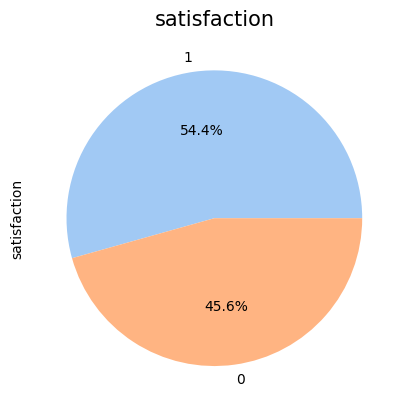

In [21]:
round(df_eda['satisfaction'].value_counts()/df_eda.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',colors = sns.color_palette('pastel')[0:5])
plt.title('satisfaction', fontsize=15)

Observasi:
- tingkat kepuasaan penumpang yang puas dengan pelayanan maskapai penerbangan lebih tinggi dibandingkan dengan yang tidak puas.
- Namun sayangnya, ketidakpuasan ini memiliki persentase yang hampir sama dengan yang puas atau sekitar 45%

In [22]:
#definisikan data visualisasi
def visualize(c):
    plt.rcParams['figure.figsize'] = [17, 4]
    x=[0.02 for i in range(len(list(df_eda[c].unique())))]

    plt.subplot(1, 3, 1)
    plt.title(f'{c} terhadap %Kepuasan', fontsize=12)
    ax = sns.countplot(data = df_eda, x = c, hue="satisfaction", palette = sns.color_palette('pastel')[0:10])
    plt.xlabel(f'{c}', fontsize= 12)
    plt.ylabel("# Kepuasan", fontsize= 12)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.01, p.get_height()+5))


    plt.subplot(1, 3, 2)
    round(df_eda[c].value_counts()/df_eda.shape[0]*500,2).plot.pie(autopct= '%1.1f%%',colors=sns.color_palette('pastel')[0:10], explode=x,shadow=True)
    plt.title(c, fontsize=12)


    plt.subplot(1,3,3)
    plt.title(f'{c} terhadap %Kepuasan', fontsize=12)
    ax = sns.barplot(x = c, y = "satisfaction", data = df_eda, palette = sns.color_palette('pastel')[0:10], errorbar= None)
    plt.ylabel("% Kepuasan", fontsize= 12)
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.2, p.get_height()+0.005),fontsize=10)


    plt.show()

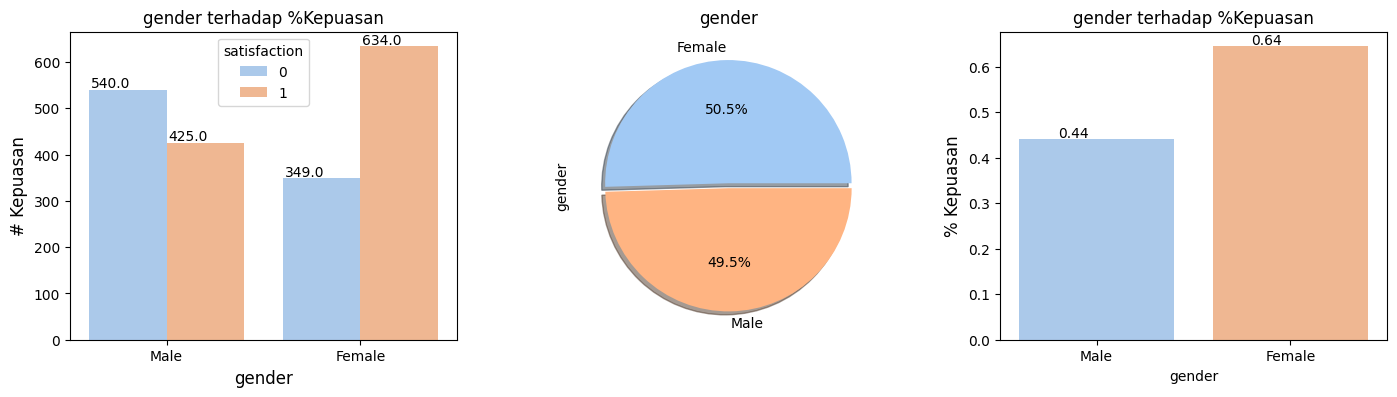

In [23]:
visualize('gender')

Observasi:
- Penumpang yang memberikan review lebih banyak yang berjenis kelamin perempuan.
- Kepuasan didominasi oleh perempuan `Female` dibandingkan dengan laki-laki `Male` yang lebih condong kearah tidak puas dengan pelayanan yang diberikan.

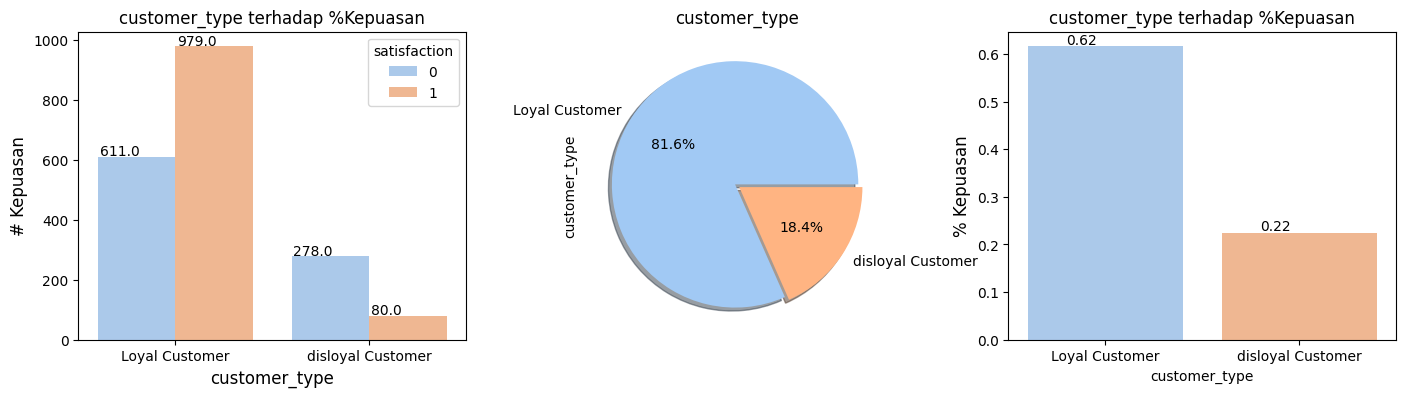

In [24]:
visualize('customer_type')

Observasi:
- penumpang setia (`loyal`) lebih banyak dibandingkan dengan penumpang yang tidka berlangganan (`disloyal`)
- penumpang setia cenderung puas dengan pelayanan yang telah diberikan, sementara penumpang disloyal cendrung tidak puas dengan pelayanan yang diberikan.

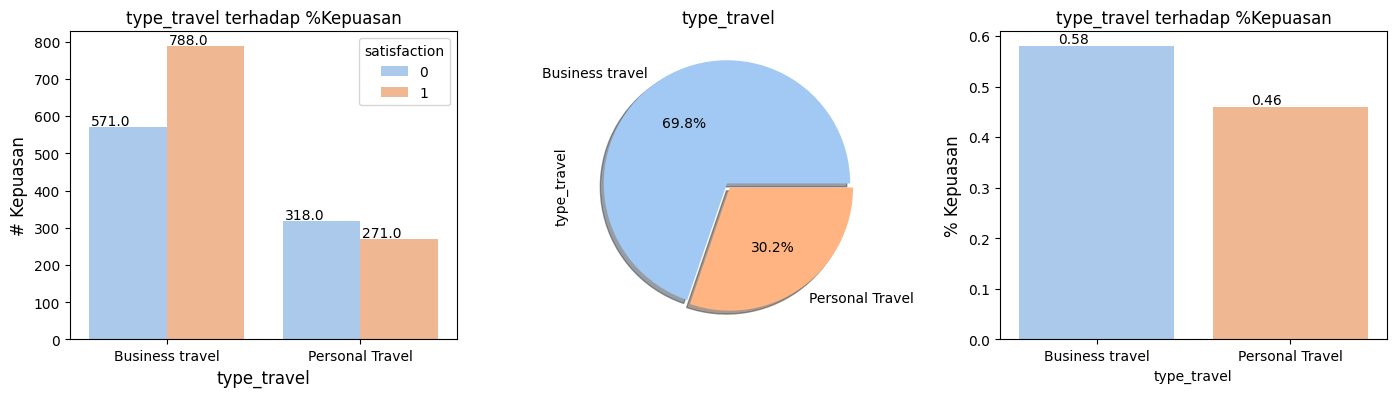

In [25]:
visualize('type_travel')

Observasi:
- Kebanyakan penumpang berpergian dengan maskpaai penerbangan ini untuk perjalanan bisnis yaitu sebesar ~65%
- Ketidakpuasan cenderung berasal dari penumpang yang melakukan perjalanan personal
- hal ini dikarenakan penumpang yang berpergian untuk perjalanan bisnis tidak mementingkan hiburan, melainkan kenyamanan dan ketenangan selama perjalanan ke tempat tujuan.

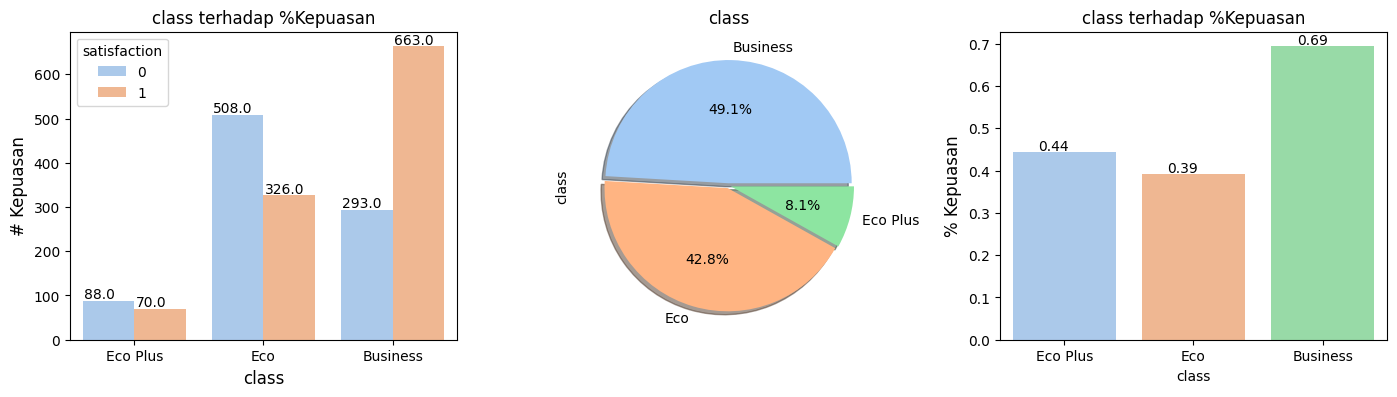

In [26]:
visualize('class')

Observasi:
- penumpang dengan kelas bisnis lebih puas dibandingkan dengan penumpang eco maupun eco plus.
- selain itu, penumpang didominasi oleh kelas bisnis

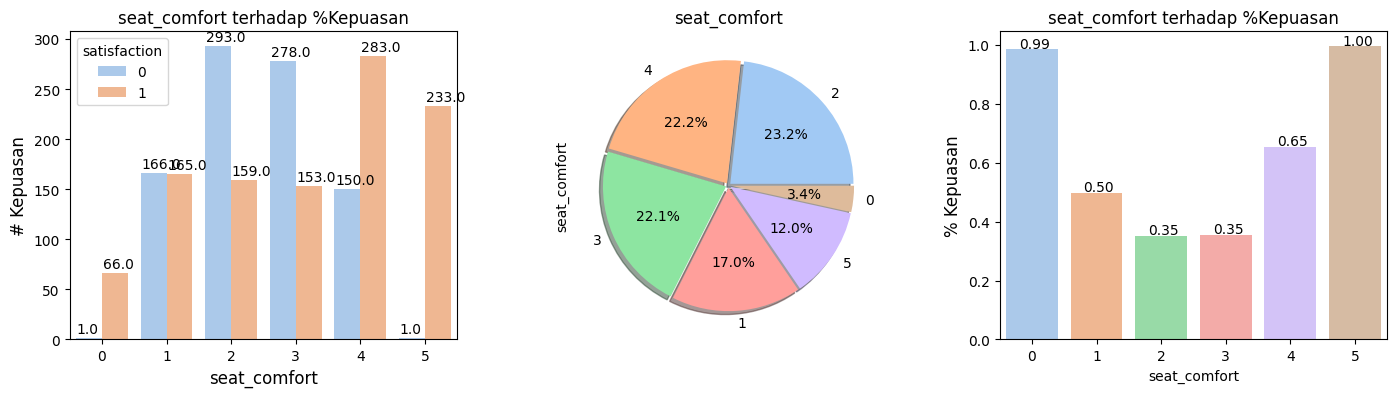

In [27]:
visualize('seat_comfort')

Observasi:
- terdapat sekitar 60 penumpang yang tidak mau menilai (0) kepuasan kenyamanan tempat duduknya.
- Didominasi oleh penumpang yang tidak puas (2) akan pelayanan maskapai penerbangan
- hanya 12% penumpang yang sangat puas dengan class yang mereka pilih

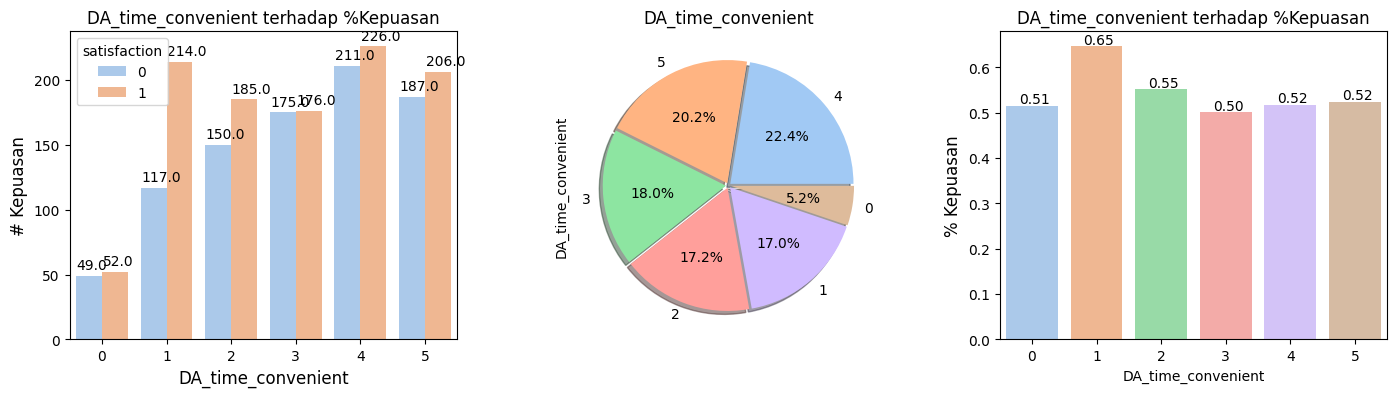

In [28]:
visualize('DA_time_convenient')

Observasi:
- tingkat kenyamanan terhadap waktu keberangkatan dan kedatangan didominasi oleh rating baik (4) dengan persentase sebesar 22.4%
- sementara terdapat 5.2% penumpang yang tidak mau menilai tingkat kenyamanan mereka.
- 20.2% penumpang sangat puas dengan waktu keberangkatan dan kedatangan pesawat

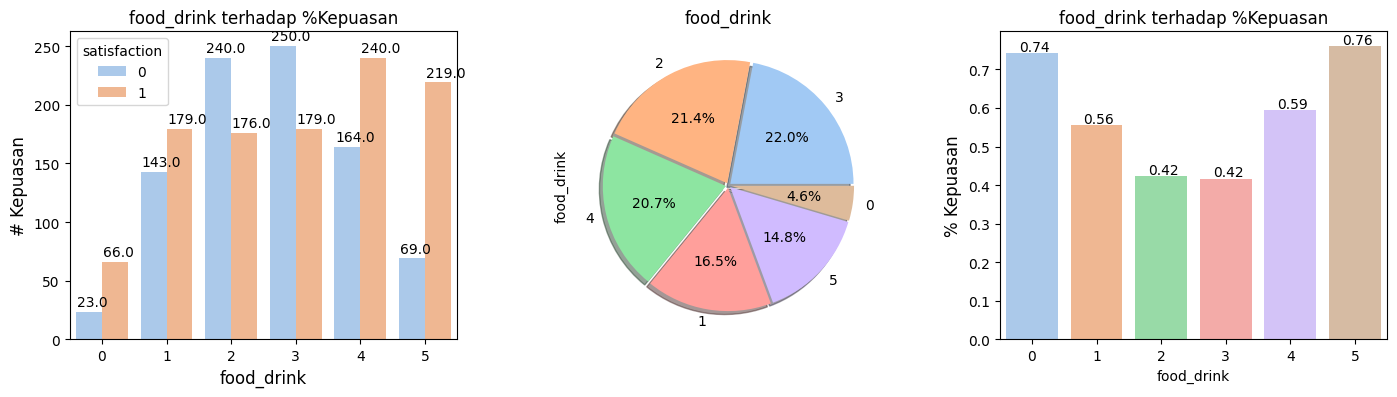

In [29]:
visualize('food_drink')

Observasi:
- rating didominasi oleh 3 (cukup baik) yaitu sebesar 22%
- hanya 14.9% yang puas dengan kenyamanan pelayanan makanan dan minuman yang diberikan.

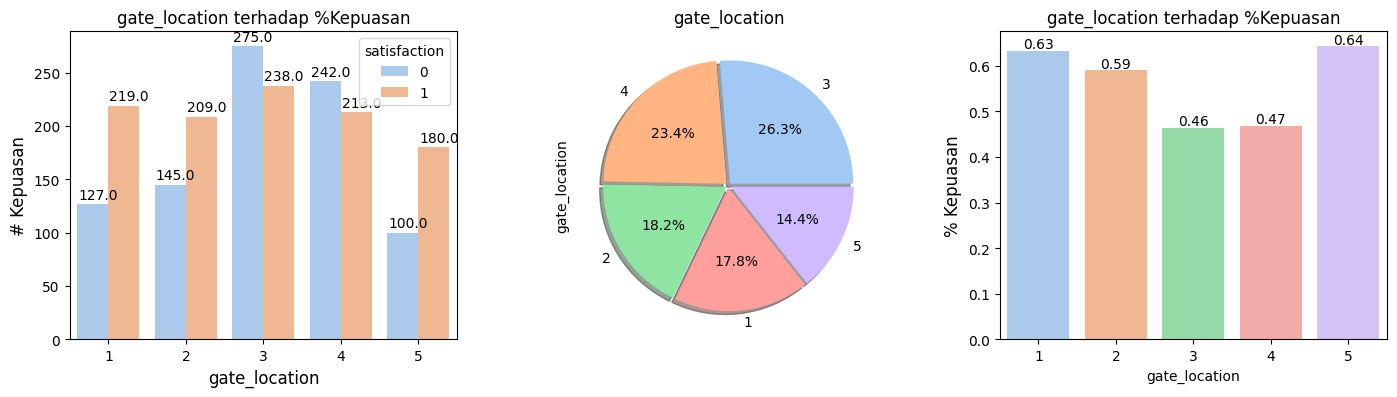

In [30]:
visualize('gate_location')

- hanya 14.4% penumpang yang puas dengan lokasi gerbang keberangkatan dan kedatangan
- rating didominasi oleh rate bernilai 3 (cukup puas)

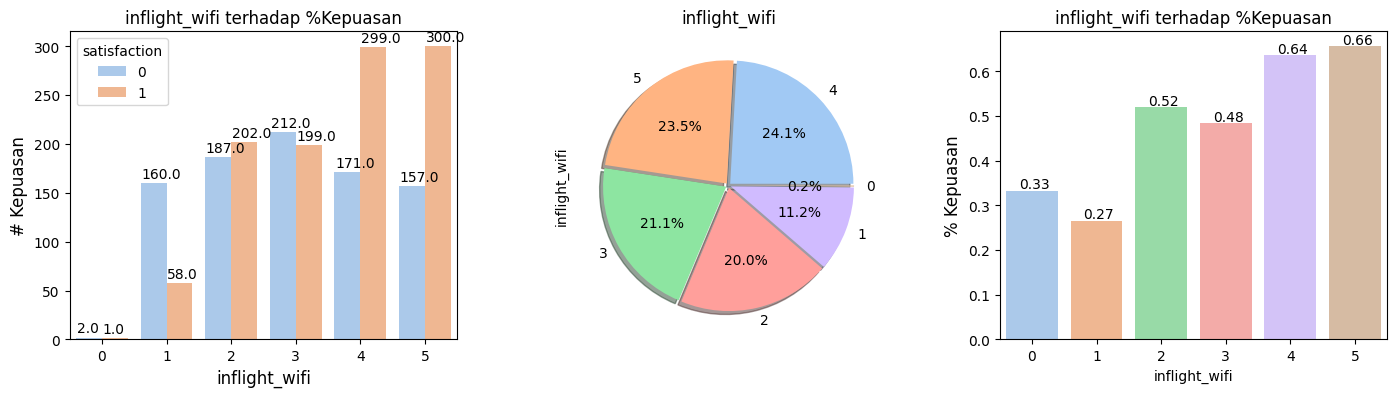

In [31]:
visualize('inflight_wifi')

Observasi:
- rating didominasi oelh rating 4 (puas) dengan persentase sebesar 24.1% yang disusul oleh penumpang yang sangat puas dengan pelayanan yang diberikan yaitu sebesar 23.5%

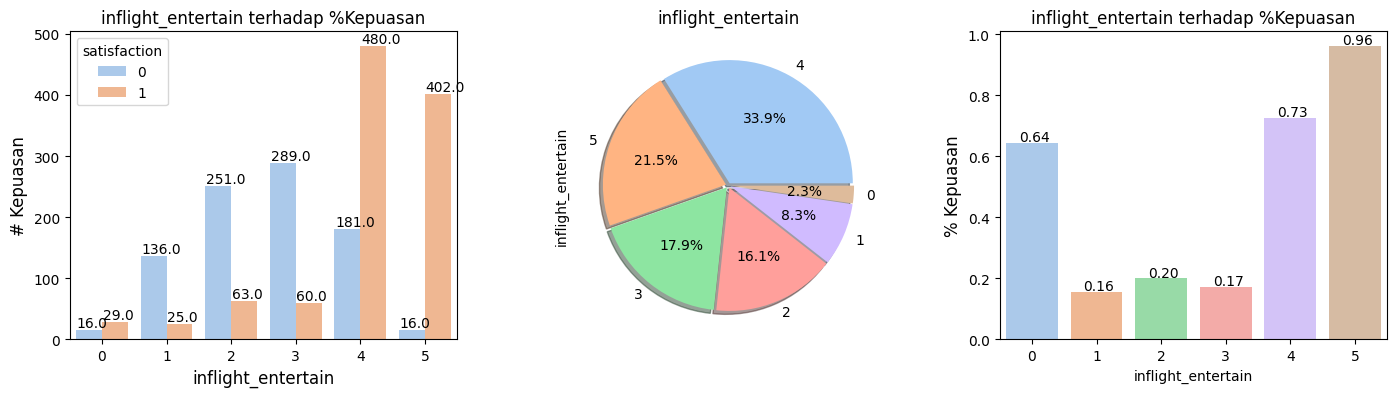

In [32]:
visualize('inflight_entertain')

Observasi:
- kepuasan hiburan saat melakukan penerbangan didominasi oleh rating 4 (puas) dan sangat puas sebesar 21.5%
- hanya sebagian kecil yang tidak puas dengan pelayanan ini

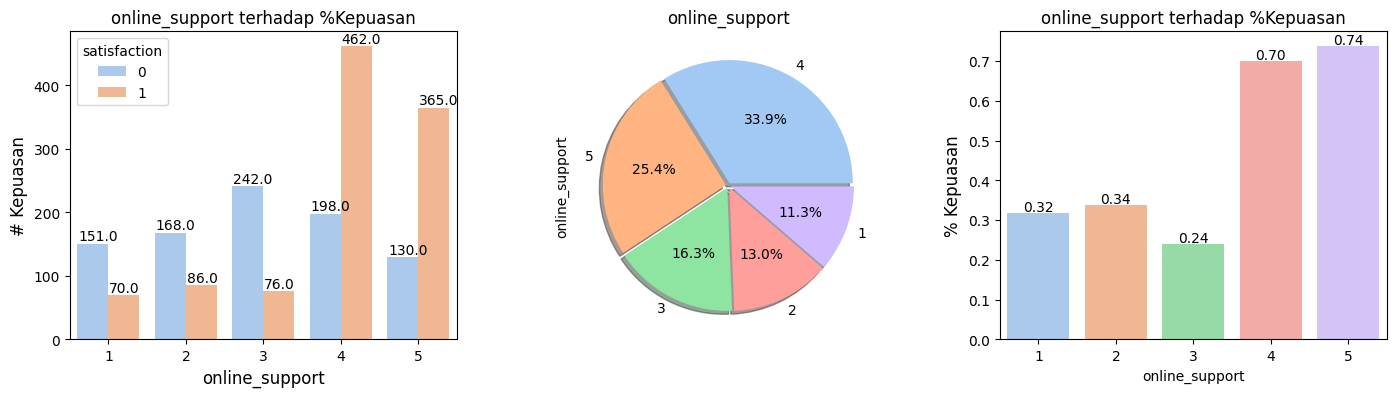

In [33]:
visualize('online_support')

Observasi:
- kepuasan pendukung layanan online dalam hal pemesanan/request service didominasi oleh rating 4 (puas) dan sangat puas sebesar 25.4%
- hanya sebagian kecil yang tidak puas dengan pelayanan ini (rating 1,2,3)

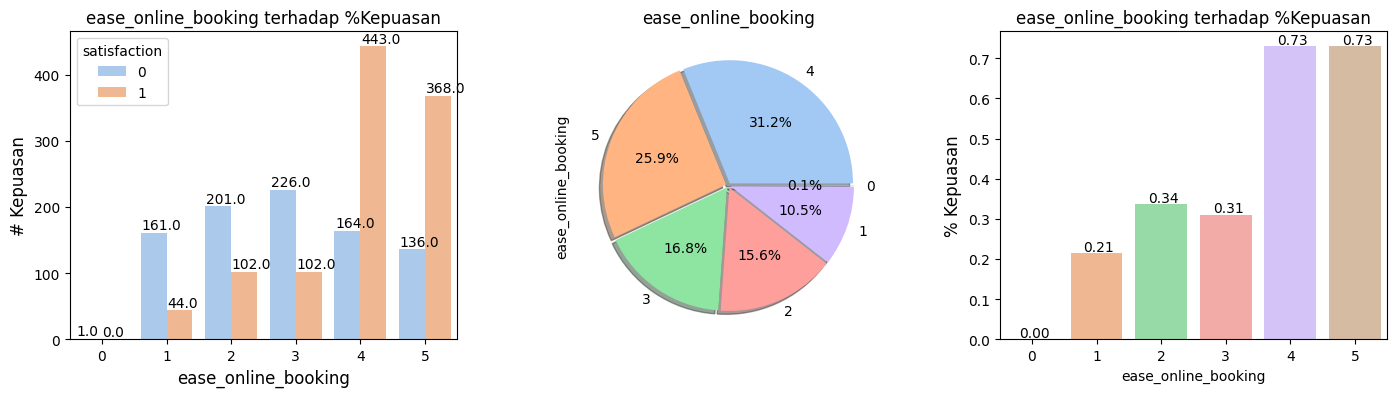

In [34]:
visualize('ease_online_booking')

Observasi:
- kepuasan booking ticket didominasi oleh rating 4 (puas) dan sangat puas sebesar ~ 31%
- hanya sebagian kecil yang tidak puas dengan pelayanan ini (rating 1,2,3)

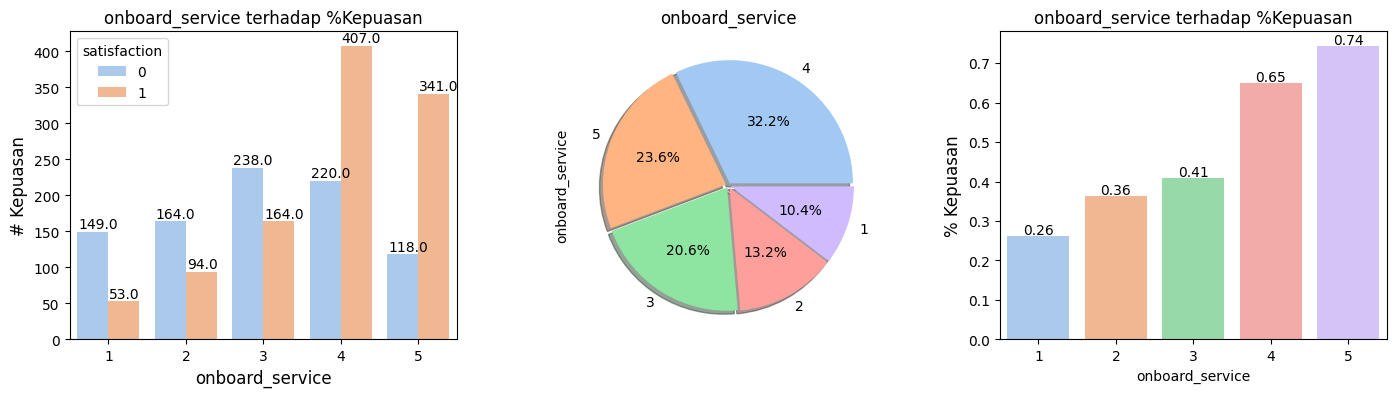

In [35]:
visualize('onboard_service')

Observasi:
- kepuasan pendukung layanan online dalam hal pemesanan/request service didominasi oleh rating 4 (puas) dan sangat puas sebesar 32.2%
- hanya sebagian kecil yang tidak puas dengan pelayanan ini (rating 1,2,3)

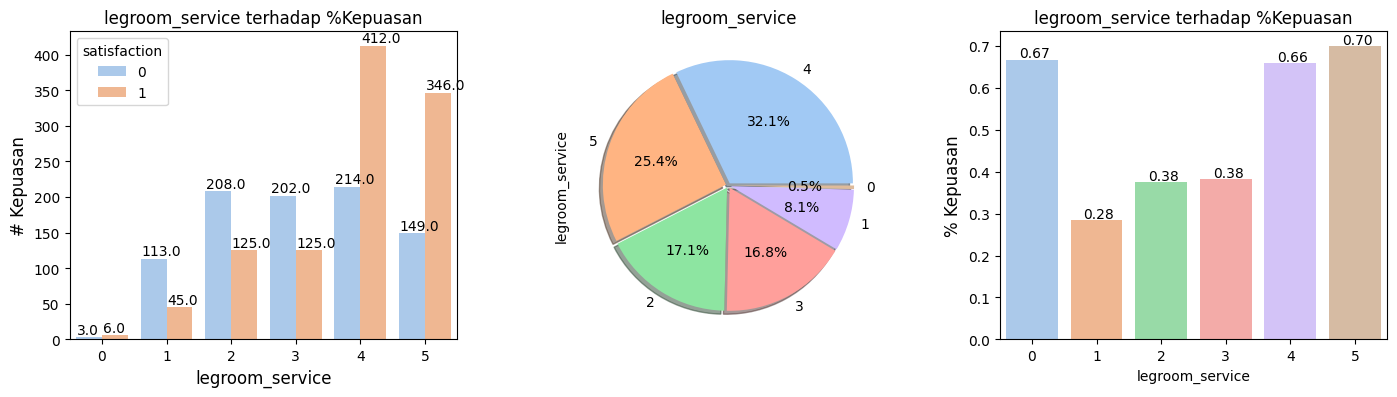

In [36]:
visualize('legroom_service')

Observasi:
- kepuasan pendukung layanan online dalam hal pemesanan/request service didominasi oleh rating 4 (puas) dan sangat puas sebesar 32.2%
- hanya sebagian kecil yang tidak puas dengan pelayanan ini (rating 1,2,3)

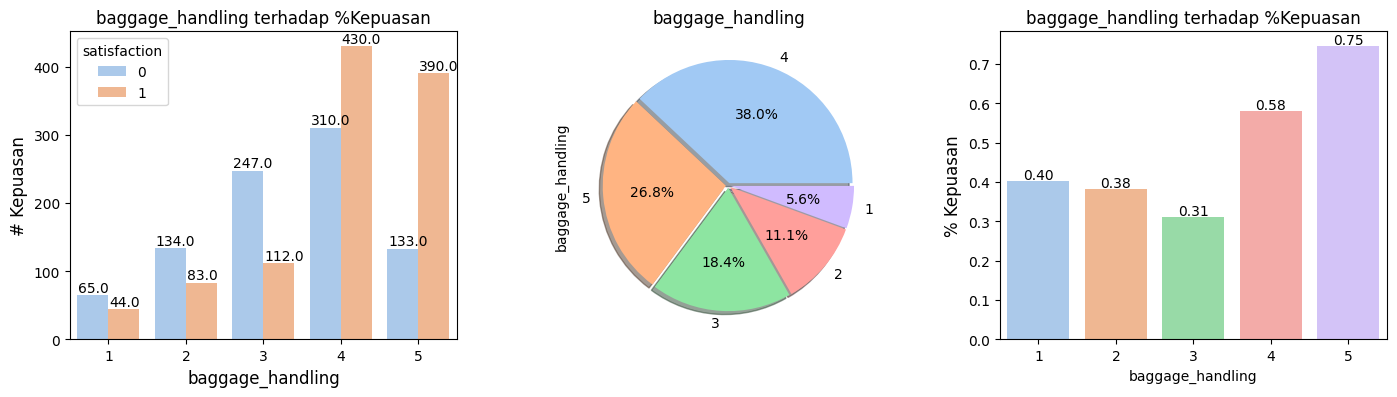

In [37]:
visualize('baggage_handling')

Observasi:
- tingkat kepuasan pelayanan didominasi oleh 4 dan 5, hal ini berarti raing didominasi oleh penumpang yang telah puas dengan rating hingga ~38%

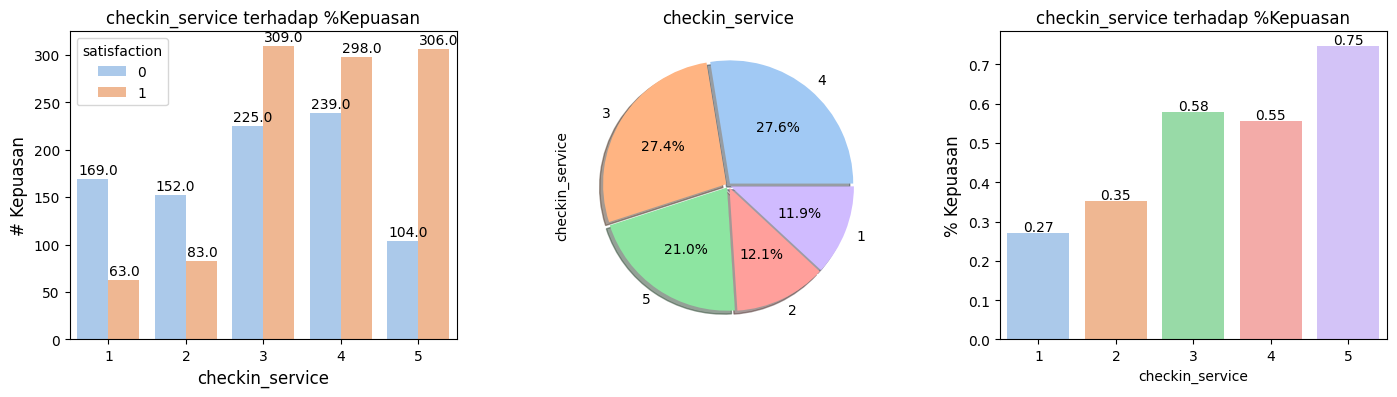

In [38]:
visualize('checkin_service')

Observasi:
- pelayanan saat melakukan check in didominasi oleh penumpang yang puas dengan pelayanan yang diberikan. Yang didominasi oleh rating 4 dan rating 5 sebesar ~27%

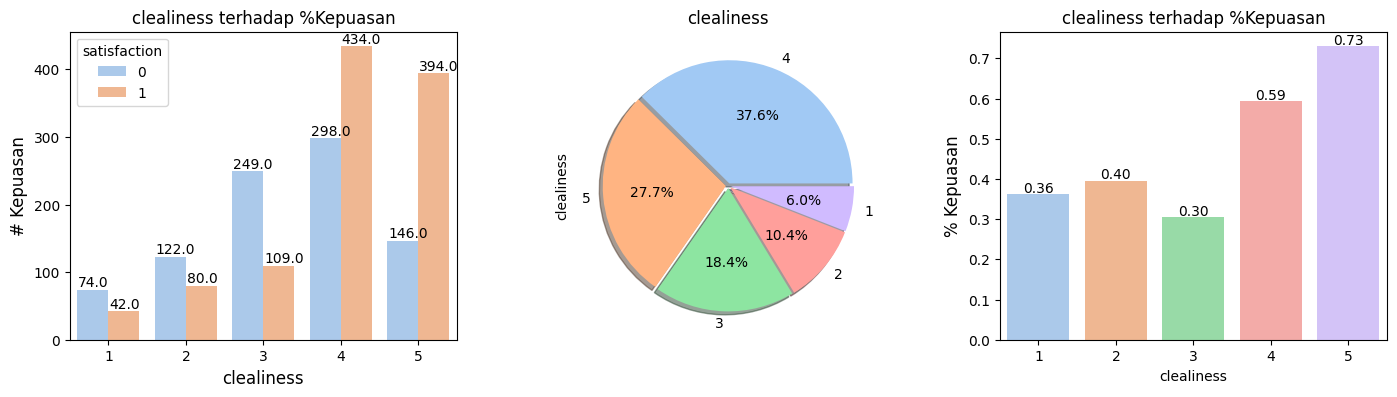

In [39]:
visualize('clealiness')

Observasi:
- tingkat kebesihan sudah baik, karena memiliki tingkat kepuasan yang tinggi dengan rating 4 keatas mendominasi penilaian ini.

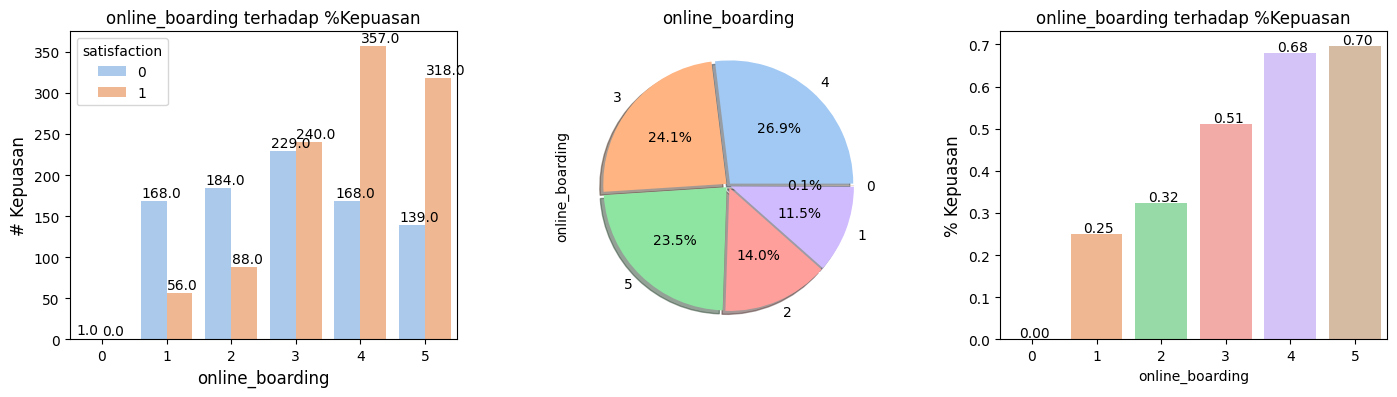

In [40]:
visualize('online_boarding')

Observasi:
- kepuasan pendukung layanan online dalam hal pemesanan/request service didominasi oleh rating 4 (puas) dan sangat puas sebesar 26.2%
- hanya sebagian kecil yang tidak puas dengan pelayanan ini (rating 1,2,3)

### Rename Data Satisfaction

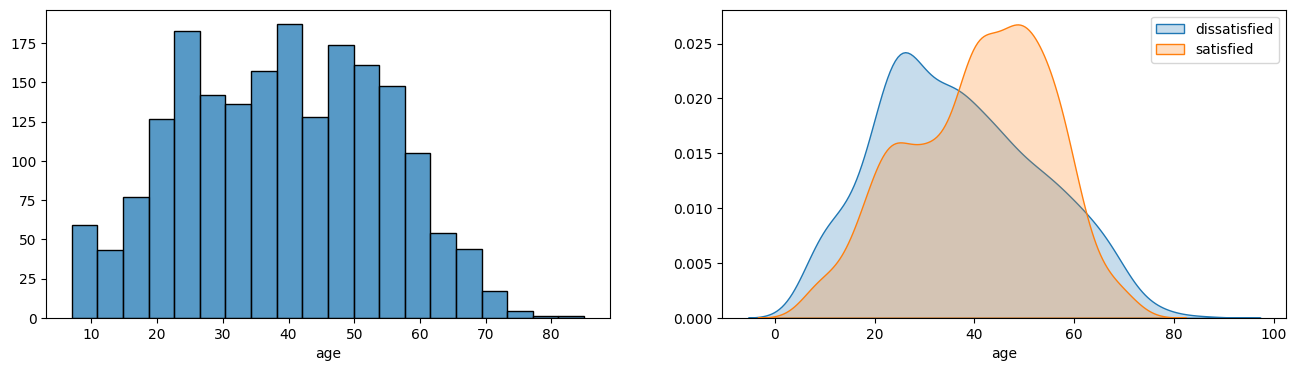

In [41]:
#Tampilkan distribusi age
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.histplot(df_eda['age'])
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('')

plt.subplot(1,2,2)
sns.kdeplot(df_eda.loc[(df_eda['satisfaction'] == 0), 'age'], label = 'dissatisfied', fill = True)
sns.kdeplot(df_eda.loc[(df_eda['satisfaction'] == 1), 'age'], label = 'satisfied', fill = True)
plt.ylabel('')
plt.legend()
plt.show()

Observasi:
- range umur kisarannya dari 7 tahun-85 tahun
- kemungkinan tertinggi penumpang tidak puas berusia < 40. Yang berarti semakin muda usia penumpang, semakin tinggi ekspektasi pelayanan yang diinginkan

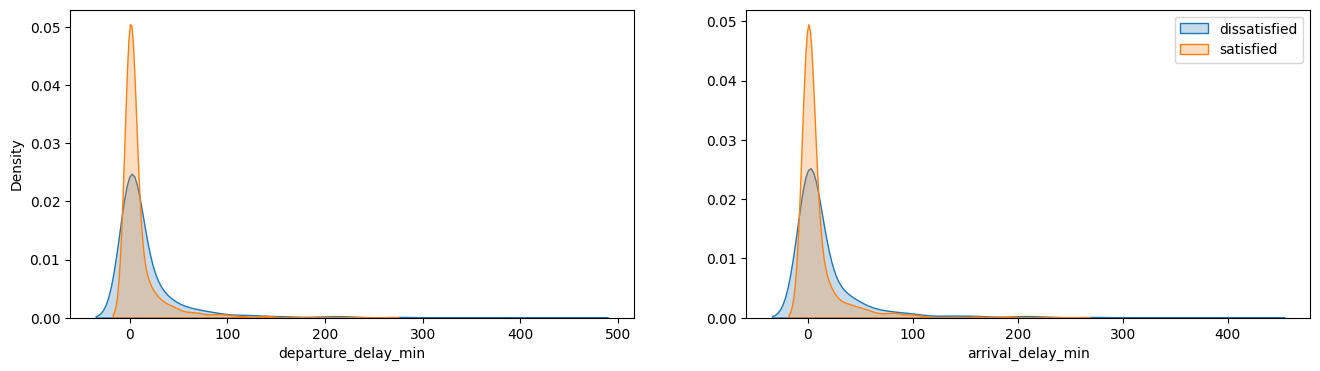

In [42]:
#Tampilkan distribusi age
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.kdeplot(df_eda.loc[(df_eda['satisfaction'] == 0), 'departure_delay_min'], label = 'dissatisfied', fill = True)
sns.kdeplot(df_eda.loc[(df_eda['satisfaction'] == 1), 'departure_delay_min'], label = 'satisfied', fill = True)

plt.subplot(1,2,2)
sns.kdeplot(df_eda.loc[(df_eda['satisfaction'] == 0), 'arrival_delay_min'], label = 'dissatisfied', fill = True)
sns.kdeplot(df_eda.loc[(df_eda['satisfaction'] == 1), 'arrival_delay_min'], label = 'satisfied', fill = True)
plt.ylabel('')
plt.legend()
plt.show()

Observasi:
- Keterlambatan kedatangan dan keberangkatan didominasi pada 100 menit pertama.
- pada range tersebut, banyak yang tidak puas akan pelayanannya namun tetap didominasi oleh penumpang-penumpang yang puas.

> Indented block



## 5 Feature Engineering

### Missing Value

In [43]:
#tampilkan missing value
df.isnull().sum()

satisfaction           0
gender                 0
customer_type          0
age                    0
type_travel            0
class                  0
flight_distance        0
seat_comfort           0
DA_time_convenient     0
food_drink             0
gate_location          0
inflight_wifi          0
inflight_entertain     0
online_support         0
ease_online_booking    0
onboard_service        0
legroom_service        0
baggage_handling       0
checkin_service        0
clealiness             0
online_boarding        0
departure_delay_min    0
arrival_delay_min      3
dtype: int64

Karena missing value hanya sedikit (3 data) maka data tersebut akan didrop.

In [44]:
#drop data null
df = df.dropna()

### Variansi

Digunakan metode f_classif (ANOVA) untuk menghitung korelasi antara fitur numerik dan kategorikal.

Berikut adalah hipotesis 0 dan hipotesis 1:
H0= tidak ada perbedaan variansi yang signifikan
H1= terdapat perbedaan variansi yang signifikan

In [45]:
#definisikan anova
df_num = SelectKBest(score_func=f_classif, k='all')
score_num = df_num.fit(df[numerical_cols], df['satisfaction'])

In [46]:
#Selanjutnya adalah print score, mean score dan feature. Kemudian pembuatan df untuk mempermudah interpretasi
print('Score dari setiap feature adalah : ', score_num.scores_)
print('Rata-Rata score adalah : ', score_num.scores_.mean())
df_score_num = pd.DataFrame([df[numerical_cols].keys(),score_num.scores_,score_num.pvalues_]).T.rename(columns= {0:'feature',1 :'score',2 :'p-value'})
df_score_num['penarikan_hipotesis'] = np.where(df_score_num['p-value'] < 0.05 , 'H1 diterima/Berpengaruh', 'H0 diterima/Tidak Berpengaruh')

Score dari setiap feature adalah :  [35.5243261   1.86032852 32.62483082 35.29699947]
Rata-Rata score adalah :  26.326621228312792


In [47]:
#print dengan sort value
df_score_num.sort_values(by='score',ascending=False).reset_index(drop=True)

,feature,score,p-value,penarikan_hipotesis
0,age,35.524326,0.0,H1 diterima/Berpengaruh
1,arrival_delay_min,35.296999,0.0,H1 diterima/Berpengaruh
2,departure_delay_min,32.624831,0.0,H1 diterima/Berpengaruh
3,flight_distance,1.860329,0.172745,H0 diterima/Tidak Berpengaruh


Observasi:
- terdapat pengaruh antara `age`, `arrival_delay_min`, dan `departure_delay_min`. Namun tidak terdapat pengaruhnya pada `flight_distance`

### split X features, y Target

In [48]:
#split data menjadi X, y
X= df.drop(['satisfaction'], axis=1)
y=df['satisfaction']

In [49]:
#tampilkan data X
X.head()

,gender,customer_type,age,type_travel,class,flight_distance,seat_comfort,DA_time_convenient,food_drink,gate_location,...,online_support,ease_online_booking,onboard_service,legroom_service,baggage_handling,checkin_service,clealiness,online_boarding,departure_delay_min,arrival_delay_min
0,Male,Loyal Customer,56,Business travel,Eco Plus,2176,5,5,5,5,...,5,5,1,4,1,3,2,5,0,10.0
1,Female,Loyal Customer,29,Business travel,Eco Plus,1406,5,5,5,5,...,5,5,2,3,4,4,5,5,0,0.0
2,Male,Loyal Customer,44,Personal Travel,Eco,1754,4,4,3,2,...,3,3,3,4,4,5,5,3,0,0.0
3,Female,Loyal Customer,36,Business travel,Business,2717,5,5,5,5,...,1,4,4,4,4,4,4,1,0,0.0
4,Female,Loyal Customer,20,Personal Travel,Eco,2250,2,2,2,2,...,4,3,3,4,3,3,3,3,0,6.0


In [50]:
#tampilkan data y
y

0          satisfied
1          satisfied
2          satisfied
3          satisfied
4          satisfied
            ...     
1943    dissatisfied
1944       satisfied
1945       satisfied
1946    dissatisfied
1947       satisfied
Name: satisfaction, Length: 1945, dtype: object

### Mapping data target

In [51]:
#Ubah satisfaction menjadi binary
y=y.map({'satisfied': 1, 'dissatisfied': 0})

In [52]:
#tampilkan data awal
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: satisfaction, dtype: int64

### Split Train-set dan Test-Set

In [53]:
#spliting antara train-set dan test-set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)
X_train.head()

Train Size :  (1556, 22)
Test Size :  (389, 22)


,gender,customer_type,age,type_travel,class,flight_distance,seat_comfort,DA_time_convenient,food_drink,gate_location,...,online_support,ease_online_booking,onboard_service,legroom_service,baggage_handling,checkin_service,clealiness,online_boarding,departure_delay_min,arrival_delay_min
1416,Male,Loyal Customer,21,Personal Travel,Business,1255,1,1,1,4,...,1,1,4,3,3,3,4,1,86,75.0
1795,Male,disloyal Customer,24,Business travel,Eco,2058,4,4,4,5,...,2,2,2,5,3,5,2,2,5,10.0
685,Male,Loyal Customer,54,Business travel,Business,2660,3,3,3,3,...,4,3,3,3,3,3,3,3,0,0.0
643,Female,Loyal Customer,49,Business travel,Eco Plus,1270,5,3,3,3,...,3,5,5,5,5,1,5,3,1,0.0
1653,Female,Loyal Customer,29,Business travel,Business,3038,1,5,5,5,...,1,1,3,3,4,1,4,1,11,7.0


In [54]:
#tampilkan y_train
y_train.head()

1416    0
1795    1
685     1
643     1
1653    0
Name: satisfaction, dtype: int64

In [55]:
#tampilkan y_test
y_test.head()

1148    1
959     1
738     1
1577    1
1780    1
Name: satisfaction, dtype: int64

### Kolom Numerik dan Kategorikal

In [56]:
#pisahkan numerik dan objek/kategorikal
categorical_cols=['gender', 'customer_type', 'type_travel',
       'class',  'seat_comfort', 'DA_time_convenient',
       'food_drink', 'gate_location', 'inflight_wifi', 'inflight_entertain',
       'online_support', 'ease_online_booking', 'onboard_service',
       'legroom_service', 'baggage_handling', 'checkin_service', 'clealiness',
       'online_boarding' ]
numerical_cols=[ 'age','flight_distance','departure_delay_min', 'arrival_delay_min']
print('categorical_cols:',len(categorical_cols),'numerical_cols', len(numerical_cols))

categorical_cols: 18 numerical_cols 4


In [57]:
#Xtrain num
X_train_num= X_train[numerical_cols]
X_train_num.head()

,age,flight_distance,departure_delay_min,arrival_delay_min
1416,21,1255,86,75.0
1795,24,2058,5,10.0
685,54,2660,0,0.0
643,49,1270,1,0.0
1653,29,3038,11,7.0


### Outlier

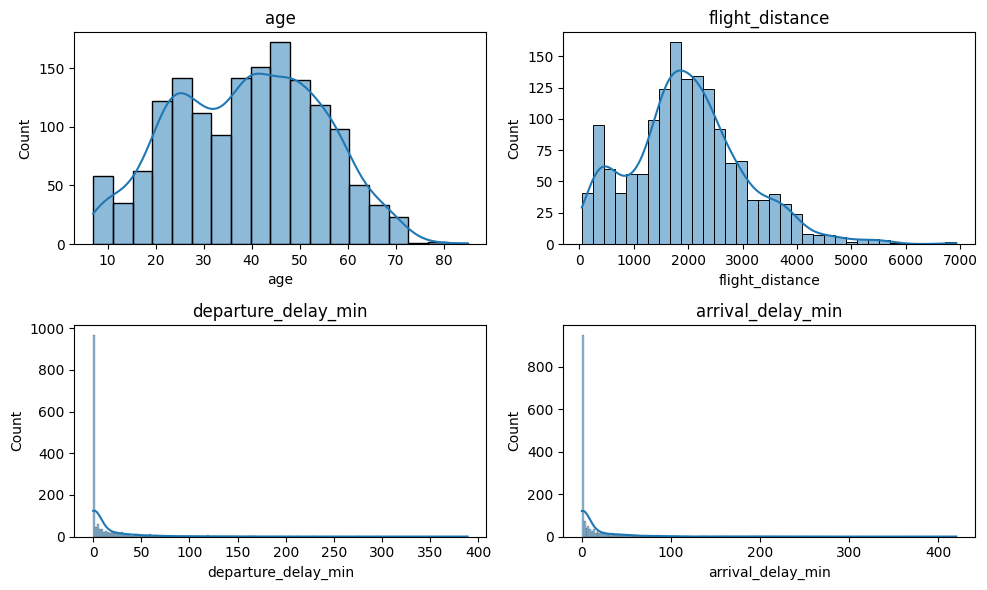

In [58]:
#Membuat plot distribusi feature numeric
k = len(numerical_cols)
n = 2
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(X_train_num.items()):
    r, c = i // n, i % n
    ax = axes[r, c]
    sns.histplot(col,kde=True,ax=ax)
    ax.set_title(name)
fig.tight_layout()

Karena data pada `departure_delay_min` dan `arrival_delay_min` tidak terlalu terlihat, maka ditampilkan data dengan batas 80

Text(0, 0.5, '')

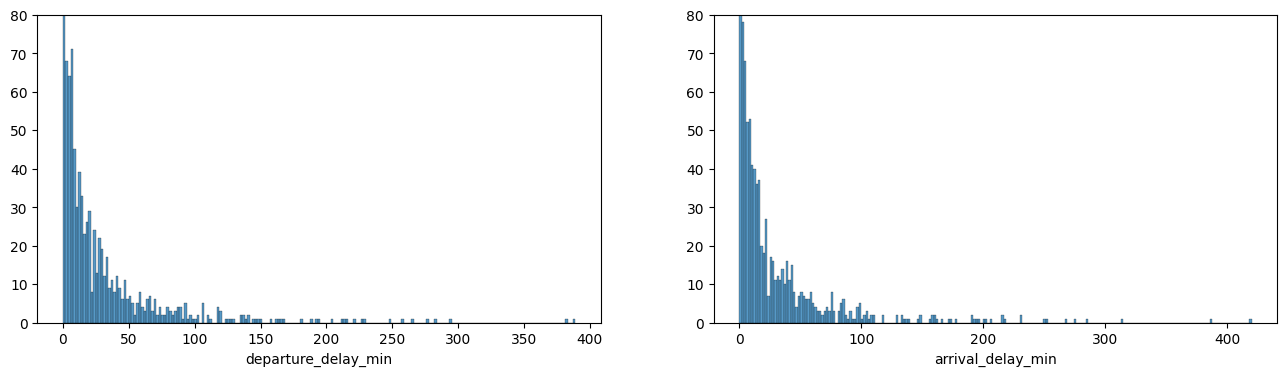

In [59]:
#Tampilkan distribusi age
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.histplot(df['departure_delay_min'])
plt.ticklabel_format(style='plain', axis='x')
plt.ylim(0,80)
plt.ylabel('')

plt.subplot(1,2,2)
sns.histplot(df['arrival_delay_min'])
plt.ticklabel_format(style='plain', axis='x')
plt.ylim(0,80)
plt.ylabel('')

Observasi:
- Data pada age dan flight distance terlihat terdistribusi cukup normal
- sementara pada departure_delay_min dan arrival_delay_min terlihat bahwa terdistribusi tidak normal yang condong skewed ke arah positif.

#### Handle Outlier

Menggunakan IQR untuk mengecek/handling outliers:
* kalkulasi kuartil (1 dan 3) Q1 dan
Q3
* evaluasi Interquartile range, IQR=Q3-Q1
* Perkirakan batas bawah dengaan, lower bound=Q1*1.5
* Perkirakan batas atas, upper_bound=Q3*1.5
* Titik-titik data yang berada diluar batas bawah dan batas atas adalah `outlier`


In [60]:
# Cek outlier pada tipe data numerik

# Menghitung IQR untuk kolom numerik
Q1 = X_train_num.quantile(0.25)
Q3 = X_train_num.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas atas dan batas bawah untuk mendeteksi outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mendeteksi outliers pada kolom numerik
outliers = (X_train_num < lower_bound) | (X_train_num > upper_bound)

# Menghitung jumlah outliers dalam setiap kolom numerik
outliers_count = outliers.sum()
#hitung
outliers_count

age                      0
flight_distance         34
departure_delay_min    212
arrival_delay_min      224
dtype: int64

Observasi:
- Oulier terdapat pada `flight_distance`, `departure_delay_min` dan `arrival_delay_min`

#### Visualisasi Oulier

In [61]:
#buat list columns
list_columns = X_train_num.columns.to_list()
list_columns

['age', 'flight_distance', 'departure_delay_min', 'arrival_delay_min']

In [62]:
#membuat def untuk boxplot dan grafik distribusi setaip kolom

def distributionplot(X_train_num, variable):
    #ukuran ukuran data
    plt.figure(figsize=(16, 3))

    #buat histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train_num[variable], bins=30)
    plt.title('Histogram '+ variable )

    #buat boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train_num[variable])
    plt.title('Boxplot ' + variable)

    plt.show()

    #Cek skew feature
    print('\nSkewness Value ',variable, ' : ' ,X_train_num[variable].skew())

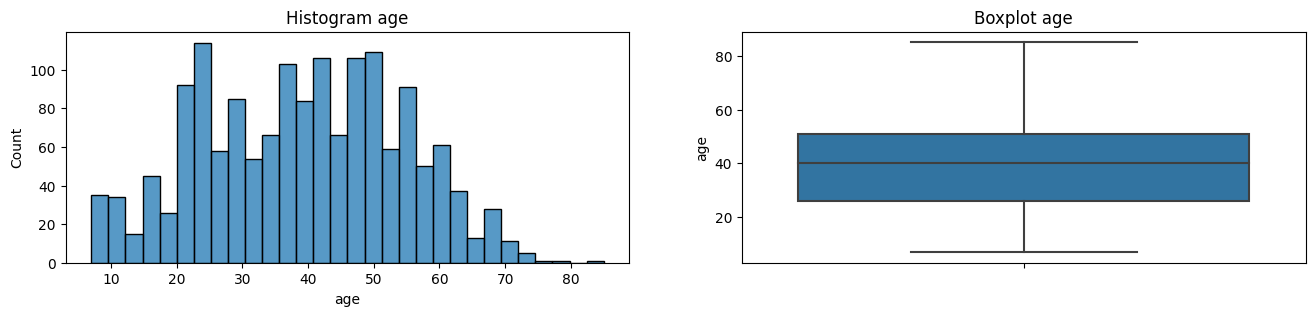


Skewness Value  age  :  -0.03200058572279495


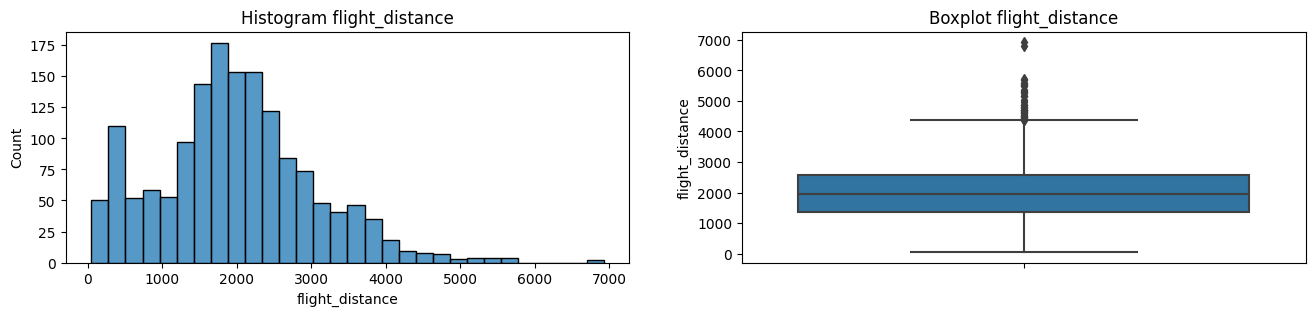


Skewness Value  flight_distance  :  0.5378789063833008


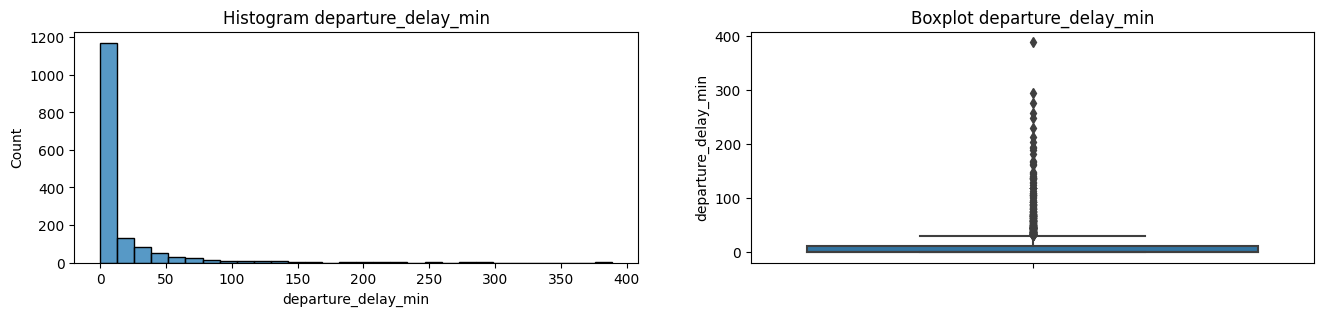


Skewness Value  departure_delay_min  :  4.585966555155


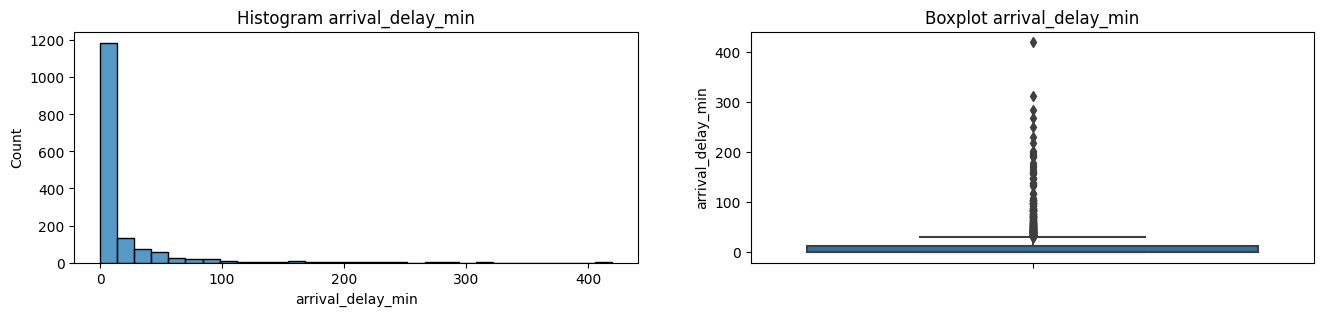


Skewness Value  arrival_delay_min  :  4.795533606485391


In [63]:
#Menampilkan distribusi data dan menampilkan outlier
for i in list_columns:
    distributionplot(X_train_num, i)

Observasi:
- Ketiga variabel tersebut, kecuali `age` berskewed positif. Sementara `age` berskewed negatif (cenderung ke arah kiri/negatif)

#### Handle outlier

Outlier yang terdeteksi adalah flight_distance, departure_delay_min, arrival_delay_min. Sehingga akan dilakukan imputasi median pada ketiga variable tersebut.

In [64]:
#definisikan median pada masing-masing variable
med_flight=X_train['flight_distance'].median()
med_dep=X_train['departure_delay_min'].median()
med_arr=X_train['arrival_delay_min'].median()

X_train.loc[X_train.age > med_flight, 'flight_distance'] = np.nan
X_train.loc[X_train.age > med_dep, 'departure_delay_min'] = np.nan
X_train.loc[X_train.age > med_arr, 'arrival_delay_min'] = np.nan

X_train.fillna(med_flight,inplace=True)
X_train.fillna(med_dep,inplace=True)
X_train.fillna(med_arr,inplace=True)



---



### Missing Value

In [65]:
#check nan
X_train.isna().sum()

gender                 0
customer_type          0
age                    0
type_travel            0
class                  0
flight_distance        0
seat_comfort           0
DA_time_convenient     0
food_drink             0
gate_location          0
inflight_wifi          0
inflight_entertain     0
online_support         0
ease_online_booking    0
onboard_service        0
legroom_service        0
baggage_handling       0
checkin_service        0
clealiness             0
online_boarding        0
departure_delay_min    0
arrival_delay_min      0
dtype: int64

In [66]:
# Check Missing Values pada  `X_test`

X_test.isnull().sum()

gender                 0
customer_type          0
age                    0
type_travel            0
class                  0
flight_distance        0
seat_comfort           0
DA_time_convenient     0
food_drink             0
gate_location          0
inflight_wifi          0
inflight_entertain     0
online_support         0
ease_online_booking    0
onboard_service        0
legroom_service        0
baggage_handling       0
checkin_service        0
clealiness             0
online_boarding        0
departure_delay_min    0
arrival_delay_min      0
dtype: int64

In [67]:
# Check Missing Values pada `y_train`

y_train.isnull().sum()

0

In [68]:
# Check Missing Values pada `y_test`

y_test.isnull().sum()

0

Observasi:
- keseluruhan data train dan test set tidak ada yang punya missing value

### Feature Selection

In [69]:
#Tampilkan data X_train
X_train.head()

,gender,customer_type,age,type_travel,class,flight_distance,seat_comfort,DA_time_convenient,food_drink,gate_location,...,online_support,ease_online_booking,onboard_service,legroom_service,baggage_handling,checkin_service,clealiness,online_boarding,departure_delay_min,arrival_delay_min
1416,Male,Loyal Customer,21,Personal Travel,Business,1255.0,1,1,1,4,...,1,1,4,3,3,3,4,1,1942.5,1942.5
1795,Male,disloyal Customer,24,Business travel,Eco,2058.0,4,4,4,5,...,2,2,2,5,3,5,2,2,1942.5,1942.5
685,Male,Loyal Customer,54,Business travel,Business,2660.0,3,3,3,3,...,4,3,3,3,3,3,3,3,1942.5,1942.5
643,Female,Loyal Customer,49,Business travel,Eco Plus,1270.0,5,3,3,3,...,3,5,5,5,5,1,5,3,1942.5,1942.5
1653,Female,Loyal Customer,29,Business travel,Business,3038.0,1,5,5,5,...,1,1,3,3,4,1,4,1,1942.5,1942.5


In [70]:
#Tampilkan data y_train
y_train.head()

1416    0
1795    1
685     1
643     1
1653    0
Name: satisfaction, dtype: int64

## 6 Model Definition

### Pipeline

Pada kasus ini akan dilakukan pemodelan menggunakan pipeline. Pipeline merupakan alur kerja dalam menerapkan machine learning. Tujuannya adalah untuk membagi tugas pembelajaran mesin lengkap menjadi alur kerja yang berhubungan satu sama lain.

Pada pipeline ini, preprocessing (feature scaling dan encoding) dimasukkan dalam alur pipeline dan diproses dalam satu kesatuan dengan algoritma pemodelan yang digunakan.

- Feature Scaling

  - Feature Scaling adalah suatu cara untuk membuat numerikal data pada dataset memiliki rentang nilai yang sama.

  - Feature scaling yang digunakan pada kasus ini adalah RobustScaler karena data yang digunakan memiliki distribusi data yang skewed. RobusScaler hampir mirip dengan standardScaler, namun scalingnya menggunakan nilai median dan quartiles, tujuannya agar tidak rentan terhadap outlier.

- Feature Encoding
  - Feature Encoding adalah salah satu tahap preprocessing untuk mengubah data kategorikal/objek menjadi angka agar dapat diproses pada algoritma pemodelan.
  - feature scaling yang digunakan pada kasus ini adalah OneHotEncoding. OneHotEncoding untuk mengubah seluruh data kategorikal menjadi nilai boleean

### Algoritma Pemodelan

Algoritma yang digunakan pada analissi ini adalah Logistic Regression, SVM (Support Vector Machine), Decision Tree, RandomForest dan KKN

- Logistic Regression digunakan untuk mengklasifikasikan data dan memodelkan probabilitas. Pada pemodelan ini, dilakukan percobaan pemodelan pada logistic regression untuk mengetahui apakah suatu penumpang pesawat merasa tidak puas (0:dissatisfied) atau puas (1:satisfied)
Selain mudah untuk diimplementasikan, model ini sangat efisien dan cepat dalam memodelkan data. Meskipun demikian, karena sifatnya yang tidak adaptif, sehingga kemungkinan  tingkat akurasi pada model juga akan tidak terlalu tinggi. Parameter-parameter yang digunakan menggunakan random_state=1
  Berikut adalah parameter yang digunakan pada logistic regression.
    - libliear karena solver ini direkomendasikan untuk dataset yang sangat besar dan memiliki dimensi yang besar juga
    - l1: fungsi penalti dengan menjumlahkan nilai akar parameter agar hasilnya semakin kecil

    - Parameter Baseline Logistic Regression:
      - >`penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None`

    - Parameter Hyperparameter Logistic Regression:
      - >`Best Hyperparameters Logistic Regression: {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}`

- Pemodelan menggunakan SVM dilakukan karena dapat digunakan pada data linear dan non-linear. Selain itu, lebih hemat memori dan memiliki pilihan kernel yang lebih beragam daripada algoritma kompleks lainnya.

  Parameter utama yang digunakan adalah `linear`: artinya data-data tersebut akan dipisahkan secara linear dengan batas penalty error C=1
  - Baseline parameter:
    - >`*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None`


- Pemodelan menggunakaan DecisionTree digunakan karena algoritma ini tidak terpengaruh oleh oulier, data null dan dapat bekerja dengan baik dengan data non-linear. Decision tree bekerja dengan mem-break down dataset yang kompleks untuk dibagi-bagi menjadi klasifikasi yang lebih simple.

   Parameter utama yang digunakan adalah criterion: entropy yaitu dilakukan dengan mengukur ketidakpastian suatu nilai acak dengan maximum kedalaman (depth) sebanyak 2.

    - Baseline parameter:
      - >`*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0`



- KKN yaitu pemodelan yang memanfaatkan jarak antara data untuk mengelompokkan suatu objek data tersebut. Dengan parameter K=25 berdasarkan best parameter. KKN digunakan karena model ini memiliki waktu training yang cepat dan dapat menjadi model baseline untuk model lainnya. Jika model ini memiliki peforma yang baik, maka kemungkinan model yang lainnya juga akan memiliki peforma yang baik juga.

    - Baseline parameter:
      - >`n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None`


- Pemodelan randomforest ini sangat baik untuk data dengan jumlah besar serta dapat mengurangi banyak noise dan outlier, overfitting, mengurangi variansi dan improve akurasi model. Pemodelan ini bekerja dengan memilih hasil predikasi terbanyak dari leaf.

    - Baseline parameter:
      - >`n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None`

    - Hyperparameter:
    - > `Best Hyperparameters RandomForest: {'classifier__max_depth': 1, 'classifier__max_features': 0.7000000000000001, 'classifier__n_estimators': 100}`



Metrics yang digunakan pada pemodelan ini diantaranya adalah `F1-Score`, `Cross Validation`
  - `F1 score` digunakan karena model perlu meninjau FP (false positif) dan FN (false negatif) akan mempengaruhi pelayanan dan bisnis dari maskapai penerbangan ini. Jika terdapat FP yang besar, peningkatan terhadap pelayanan kepada penumpang tidak akan meningkat secara signifikan. Karena dianggap pelayanan telah baik dan memuaskan. Jika terdapat FN yang besar akan terjadi perombakan yang signifikan terhadap pelayanan maskapai penerbangan. Hal ini juga dapat berdampak buruk pada pekerja-pekerja di maspaai penerbangan tersebut.
  - `cross validation` digunakan untuk validasi nilai `ROC-AUC ` pada training yang menunjukkan apakah nilai yang dihasilkan sudah sesuai dengna classification report atau belum.
  - Metrics `Accuracy` digunakan karena data cukup balance
  

### Null Accuracy

Sebelum melakukan pemodelan, sebaiknya dilakukan pengecekan nilai akurasi pada nilai null terlebih dahulu untuk mengetahui apakah pemodelan yang dilakukan sudah lebih baik sebelum dan sudah dilakukan pemodelan

In [71]:
# hitung data y_test
y_test.value_counts()

1    208
0    181
Name: satisfaction, dtype: int64

In [72]:
#tampilkan data null
null_accuracy= y_test.value_counts()[1]/(y_test.value_counts()[1]+y_test.value_counts()[0])
null_accuracy

0.5347043701799485

Nilai akurasi model harus diatas 53% untuk dapat dikatakan pemodelan yang baik. Selanjutnya, perlu dilakukan pengecekan dengan confusion matrix untuk mengetahui performasi dari model dan jenis error yang dihasilkan oleh model.




---



## 7 Model Training

### Baseline Model

Baseline model ini melakukan pemodelan dengan default parameter dan tidak dilakukan hyperparameter tunning.

In [73]:
#define random_state
global_random_state=1

In [74]:
#---------------------------------------------------

# Definisikan kolom-kolom yang akan digunakan
numerical_cols=['age', 'flight_distance', 'departure_delay_min', 'arrival_delay_min']
categorical_cols=['gender', 'customer_type', 'type_travel',
       'class',  'seat_comfort', 'DA_time_convenient',
       'food_drink', 'gate_location', 'inflight_wifi', 'inflight_entertain',
       'online_support', 'ease_online_booking', 'onboard_service',
       'legroom_service', 'baggage_handling', 'checkin_service', 'clealiness',
       'online_boarding' ]

# Preprocessing pipeline
numerical_transformer = RobustScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Logistic Regression pipeline
logreg_pipelineb = Pipeline(steps=[
        ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=global_random_state))

])
# SVM pipeline
svm_pipelineb = Pipeline(steps=[
        ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=global_random_state))
])

#DecisionTree pipeline
dectree_pipelineb = Pipeline(steps=[
        ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=global_random_state))
])

# KKN pipeline
kkn_pipelineb = Pipeline(steps=[
        ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# RandomForest pipeline
rf_pipelineb = Pipeline(steps=[
        ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=global_random_state))
])


#---------------------------------------------------

# fit
logreg_pipelineb.fit(X_train, y_train)
svm_pipelineb.fit(X_train, y_train)
dectree_pipelineb.fit(X_train, y_train)
kkn_pipelineb.fit(X_train, y_train)
rf_pipelineb.fit(X_train, y_train)

# Predict Train-Set
logreg_pred_trainb = logreg_pipelineb.predict(X_train)
svm_pred_trainb = svm_pipelineb.predict(X_train)
dectree_pred_trainb = dectree_pipelineb.predict(X_train)
kkn_pred_trainb = kkn_pipelineb.predict(X_train)
rf_pred_trainb = rf_pipelineb.predict(X_train)

# Predict
logreg_predb = logreg_pipelineb.predict(X_test)
svm_predb = svm_pipelineb.predict(X_test)
dectree_predb = dectree_pipelineb.predict(X_test)
kkn_predb = kkn_pipelineb.predict(X_test)
rf_predb = rf_pipelineb.predict(X_test)

### Evaluasi Hasil Prediksi Logistic regression

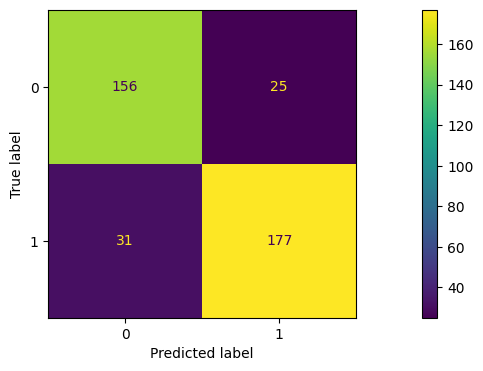

In [75]:
#Model Evaluation Confussion Matrix Test-Set Logistic Regression
cm_test_log = confusion_matrix(y_test, logreg_predb)
ConfusionMatrixDisplay(cm_test_log).plot()

Observasi:
- Berdasarkan prediksi logistic regression tersebut, terdapat banyak kesalahan yang memprediksi penumpang *satisfied* sebesar 25, namun nyatanya tidak. Dan memprediksi penumpang *dissatisfied* sebesar 31 padahal tidak

#### Evaluasi Metrics

Selanjutnya dilakukan evaluasi berdasarkan metric.

In [76]:
# Model Evaluation - Train Set Logistic Regression
print(classification_report(y_train, logreg_pred_trainb))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       707
           1       0.91      0.92      0.92       849

    accuracy                           0.91      1556
   macro avg       0.91      0.91      0.91      1556
weighted avg       0.91      0.91      0.91      1556



In [77]:
# Model Evaluation - Train Set Logistic Regression
print(classification_report(y_test, logreg_predb))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       181
           1       0.88      0.85      0.86       208

    accuracy                           0.86       389
   macro avg       0.86      0.86      0.86       389
weighted avg       0.86      0.86      0.86       389



In [78]:
#Perhitungan ROC-AUC Test Logistic Regression Train
y_pred_proba_train = logreg_pipelineb.predict_proba(X_train)[:, 1]
auc_log_train = roc_auc_score(y_train, y_pred_proba_train)
auc_log_train

0.9711433536084553

AUC score model ini untuk kelas *satisfied* adalah 0.97. Nilai ini cukup jauh dari nilai classification report.

Observasi:

Dari perbandingan score hasil prediksi train dan test dapat disimpulkan bahwa:
- nilai f1-score untuk kelas *sattisfied* pada train dan test cukup tinggi. Untuk train di angka 0.92 dan pada test sebesar 0.86. Ini berarti overfit.
- model memiliki akurasi 86% dan baik dalam mengklasifikasikan ke kelas *satisfied* dan *dissatisfied*
- presisi kelas *dissatisfied*: sebesar 88% yang benar dan presisi kelas *satisfied* sebesar 83%
- recall kelas *satisfied* sebesar 85% memprediksi benar dan 86% kelas *dissatisfied*

### Evaluasi Hasil Prediksi SVM

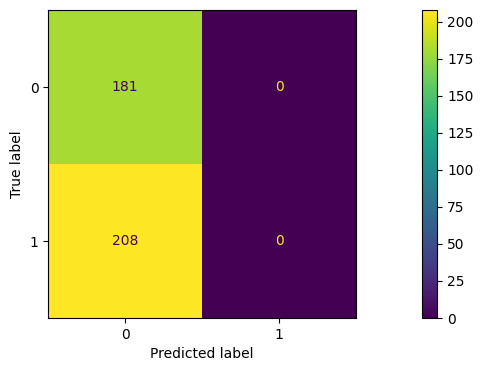

In [79]:
#Model Evaluation Confussion Matrix Test-Set
cm_test_svm = confusion_matrix(y_test, svm_predb)
ConfusionMatrixDisplay(cm_test_svm).plot()

Observasi:
- Berdasarkan prediksi SVM tersebut, terdapat banyak kesalahan yang memprediksi penumpang *dissatisfied* sebesar 208 penumpang, namun nyatanya tidak. Dan memprediksi penumpang *ssatisfied* sebesar 0. Nilai tersebut sangat buruk karena data tersebut salah dalam memprediksi data.

#### Evaluasi Metrics

Selanjutnya dilakukan evaluasi berdasarkan metric.

In [80]:
# Model Evaluation - Train Set
print(classification_report(y_train, svm_pred_trainb))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       707
           1       0.97      0.97      0.97       849

    accuracy                           0.97      1556
   macro avg       0.97      0.97      0.97      1556
weighted avg       0.97      0.97      0.97      1556



AUC score model ini untuk kelas *satisfied* adalah 0.97. Nilai ini cukup jauh dari nilai classification report.

In [81]:
# Model Evaluation - Train Set
print(classification_report(y_test, svm_predb, zero_division=0))

              precision    recall  f1-score   support

           0       0.47      1.00      0.64       181
           1       0.00      0.00      0.00       208

    accuracy                           0.47       389
   macro avg       0.23      0.50      0.32       389
weighted avg       0.22      0.47      0.30       389



Observasi:
Dari perbandingan score hasil prediksi train dan test dapat disimpulkan bahwa:
- nilai f1-score untuk kelas *sattisfied* pada train train sangat buruk yaitu sebesar 0, sementara pada *disatisfied* bernilai 0.64. Data ini sangat underfit
- model memiliki akurasi train sebesar 97% dan
pada test sebesar0.47%.
- presisi kelas *dissatisfied*: sebesar 0.47% yang benar dan presisi kelas *satisfied* sebesar 0%
- recall kelas *dissatisfied* sebesar 64% memprediksi benar dan 0% kelas *satisfied*
- Pemodelan dengan svm sangat buruk dan underfit

### Evaluasi Hasil Prediksi kkn

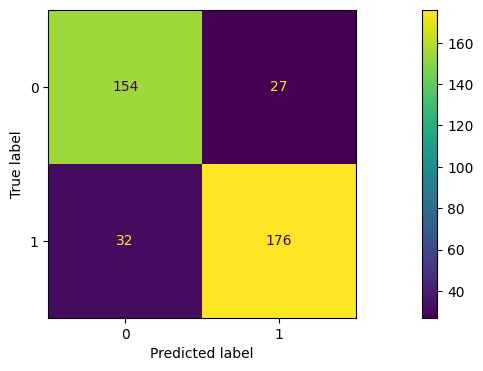

In [82]:
#Model Evaluation Confussion Matrix Test-Set
cm_test_log = confusion_matrix(y_test, kkn_predb)
ConfusionMatrixDisplay(cm_test_log).plot()

Observasi:
- Berdasarkan prediksi KKN tersebut, terdapat banyak kesalahan yang memprediksi penumpang *satisfied* namun nyatanya tidak sebesar 27 penumpang. Dan memprediksi penumpang *dissatisfied* namun sebenarnya *satisfied* sebesar 32 penumpang

#### Evaluasi Metrics

Selanjutnya dilakukan evaluasi berdasarkan metric.

In [83]:
# Model Evaluation - Train Set
print(classification_report(y_train, kkn_pred_trainb))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       707
           1       0.92      0.94      0.93       849

    accuracy                           0.92      1556
   macro avg       0.92      0.92      0.92      1556
weighted avg       0.92      0.92      0.92      1556



In [84]:
# Model Evaluation - Train Set
print(classification_report(y_test, kkn_predb))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       181
           1       0.87      0.85      0.86       208

    accuracy                           0.85       389
   macro avg       0.85      0.85      0.85       389
weighted avg       0.85      0.85      0.85       389



Observasi:
Dari perbandingan score hasil prediksi train dan test dapat disimpulkan bahwa:
- nilai f1-score untuk kelas *sattisfied* pada train dan test cukup tinggi. Untuk train di angka 0.93 dan pada test sebesar 0.85. Ini berarti pemodelan ini overfit.
- model memiliki akurasi 85% dan cukup baik dalam mengklasifikasikan ke kelas *satisfied* dan *dissatisfied*
- presisi kelas *dissatisfied*: sebesar 83% yang benar dan presisi kelas *satisfied* sebesar 87%
- recall kelas *satisfied* sebesar 85% memprediksi benar dan 85% kelas *dissatisfied* hal ini berarti model cukup baik memprediksi 2 kelas tersebut dengan benar

### Evaluasi Hasil Prediksi Decision Tree

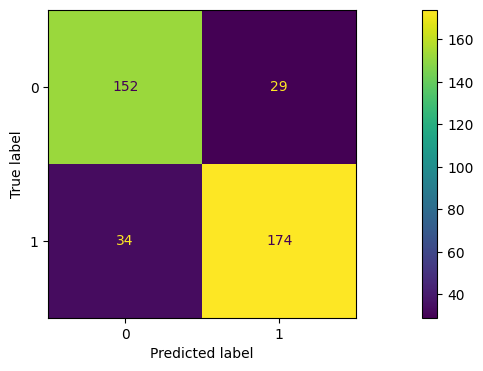

In [85]:
#Model Evaluation Confussion Matrix Test-Set
cm_test_log = confusion_matrix(y_test, dectree_predb)
ConfusionMatrixDisplay(cm_test_log).plot()

Observasi:
- Berdasarkan prediksi decision tree tersebut, terdapat banyak kesalahan yang memprediksi penumpang *satisfied* yang sebenarnya adalah *dissatisfied* sebesar 29 penumpang. Dan memprediksi penumpang *dissatisfied* yang sebenarnya *satisfied* sebesar 34 penumpang

#### Evaluasi Metrics

Selanjutnya dilakukan evaluasi berdasarkan metric.

In [86]:
# Model Evaluation - Train Set
print(classification_report(y_train, dectree_pred_trainb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       707
           1       1.00      1.00      1.00       849

    accuracy                           1.00      1556
   macro avg       1.00      1.00      1.00      1556
weighted avg       1.00      1.00      1.00      1556



In [87]:
# Model Evaluation - Train Set
print(classification_report(y_test, dectree_predb))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       181
           1       0.86      0.84      0.85       208

    accuracy                           0.84       389
   macro avg       0.84      0.84      0.84       389
weighted avg       0.84      0.84      0.84       389



Observasi:

Dari perbandingan score hasil prediksi train dan test dapat disimpulkan bahwa:
- nilai f1-score untuk kelas *sattisfied* pada train dan test cukup tinggi. Untuk train di angka 1 dan pada test sebesar 0.85. Ini berarti overfit.
- model memiliki akurasi 100% untuk prediksi train dan test akurasi sebesar 84% untuk memprediksi kelas *satisfied* dan *dissatisfied*
- presisi kelas *dissatisfied*: sebesar 82%  dan presisi kelas *satisfied* sebesar 86%
- recall kelas *satisfied* sebesar 84% memprediksi benar dan 84% kelas *dissatisfied*

### Evaluasi Hasil Prediksi Random Forest

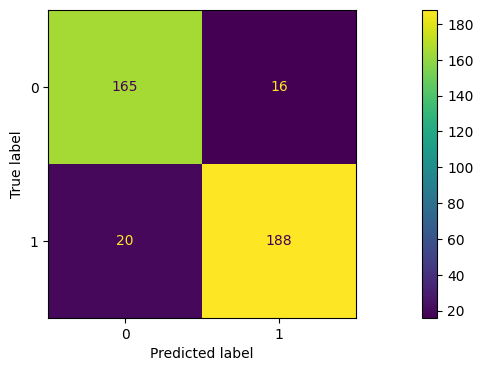

In [88]:
#Model Evaluation Confussion Matrix Test-Set
cm_test_log = confusion_matrix(y_test,rf_predb)
ConfusionMatrixDisplay(cm_test_log).plot()

Observasi:
- Berdasarkan prediksi random forest tersebut, terdapat banyak kesalahan yang memprediksi penumpang *satisfied* yang *dissatisfied* sebesar 25. Dan memprediksi penumpang *dissatisfied* yang *satisfied *sebesar 16 penumpang

#### Evaluasi Metrics

Selanjutnya dilakukan evaluasi berdasarkan metric.

In [89]:
# Model Evaluation - Train Set
print(classification_report(y_train, rf_pred_trainb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       707
           1       1.00      1.00      1.00       849

    accuracy                           1.00      1556
   macro avg       1.00      1.00      1.00      1556
weighted avg       1.00      1.00      1.00      1556



In [90]:
# Model Evaluation - Train Set
print(classification_report(y_test, rf_predb))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       181
           1       0.92      0.90      0.91       208

    accuracy                           0.91       389
   macro avg       0.91      0.91      0.91       389
weighted avg       0.91      0.91      0.91       389



Observasi:
Dari perbandingan score hasil prediksi train dan test dapat disimpulkan bahwa:
- nilai f1-score untuk kelas *sattisfied* pada train dan test cukup tinggi. Untuk train di angka 1 dan pada test sebesar 0.91. Ini berarti overfit.
- model memiliki akurasi 91% dan baik dalam mengklasifikasikan ke kelas *satisfied* dan *dissatisfied*
- presisi kelas *dissatisfied*: sebesar 89% yang benar dan presisi kelas *satisfied* sebesar 92%
- recall kelas *satisfied* sebesar 90% memprediksi benar dan 91% kelas *dissatisfied*
Berarti pemodelan ini dapat memprediksi kelas *satisfied* dan *dissatisfied* dengan baik

## 8 Model Evaluation

### Pipeline Pemodelan

Selanjutnya dilakukan hyperparameter, gridsearch serta cross validation untuk meningkatkan tingkat akurasi pemodelan.

In [91]:
#define random state
global_random_state=1

In [92]:
numerical_cols=['age', 'flight_distance', 'departure_delay_min', 'arrival_delay_min']
categorical_cols=['gender', 'customer_type', 'type_travel',
       'class',  'seat_comfort', 'DA_time_convenient',
       'food_drink', 'gate_location', 'inflight_wifi', 'inflight_entertain',
       'online_support', 'ease_online_booking', 'onboard_service',
       'legroom_service', 'baggage_handling', 'checkin_service', 'clealiness',
       'online_boarding' ]

# Preprocessing pipeline
numerical_transformer = RobustScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

#---------------------------------------------------

# Logistic Regression pipeline
logreg_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=global_random_state))#
])


#---------------------------------------------------
# Hyperparameter grid untuk Logistic Regression
logreg_param_grid = {
    'classifier__C': [0.1, 1,5, 10,100, 1000],
    'classifier__solver': ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__random_state':[1]
}

In [93]:
# Grid Search untuk Logistic Regression
logreg_grid_search = GridSearchCV(logreg_pipeline, logreg_param_grid, cv=10)
logreg_grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         RobustScaler(),
                                                                         ['age',
                                                                          'flight_distance',
                                                                          'departure_delay_min',
                                                                          'arrival_delay_min']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['gender',
                                                                          'customer_type',
                                                                          'type_travel',
                                                                          'class',
                                                                          'seat_comfort',
                                                                          'DA_time_convenient',
                                                                          'food_drink',
                                                                          'gate_location',
                                                                          'inflig...
                                                                          'online_support',
                                                                          'ease_online_booking',
                                                                          'onboard_service',
                                                                          'legroom_service',
                                                                          'baggage_handling',
                                                                          'checkin_service',
                                                                          'clealiness',
                                                                          'online_boarding'])])),
                                       ('classifier',
                                        LogisticRegression(random_state=1))]),
             param_grid={'classifier__C': [0.1, 1, 5, 10, 100, 1000],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__random_state': [1],
                         'classifier__solver': ['liblinear']})

In [94]:
# Best hyperparameters untuk Logistic Regression
logreg_best_params = logreg_grid_search.best_params_
print("Best Hyperparameters Logistic Regression:", logreg_best_params)

Best Hyperparameters Logistic Regression: {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__random_state': 1, 'classifier__solver': 'liblinear'}


In [95]:
# Predict Train-Set
logreg_pred_train = logreg_grid_search.predict(X_train)

In [96]:
# Predict test
logreg_pred = logreg_grid_search.predict(X_test)

In [97]:
#menampilkan classification report dari masing-masing train dan test
print('LG',classification_report(y_train,logreg_pred_train ))

LG               precision    recall  f1-score   support

           0       0.90      0.90      0.90       707
           1       0.92      0.92      0.92       849

    accuracy                           0.91      1556
   macro avg       0.91      0.91      0.91      1556
weighted avg       0.91      0.91      0.91      1556



In [98]:
#menampilkan classification report dari masing-masing train dan test
print('LG',classification_report(y_test,logreg_pred ))

LG               precision    recall  f1-score   support

           0       0.84      0.87      0.85       181
           1       0.88      0.86      0.87       208

    accuracy                           0.86       389
   macro avg       0.86      0.86      0.86       389
weighted avg       0.86      0.86      0.86       389



Observasi:
- setelah divalidasi dengan cross validation = 10 fold, model logistic regression memiliki akurasi hasil classification report train-set yaitu 0.91 dan test train sebesar 0.86. Hal ini berarti pemodelan tersebut overfit.

### Evaluasi Hasil Prediksi Random Forest Parameter Tuning

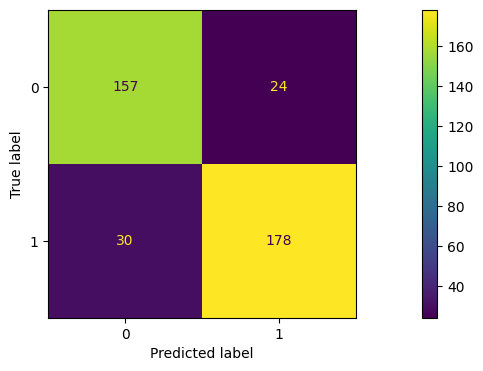

In [99]:
#Model Evaluation Confussion Matrix Test-Set
cm_test_log = confusion_matrix(y_test,logreg_pred)
ConfusionMatrixDisplay(cm_test_log).plot()

Observasi:
- Berdasarkan prediksi logistic regression tersebut, terdapat banyak kesalahan yang memprediksi penumpang *satisfied* sebesar 24, namun nyatanya tidak. Dan memprediksi penumpang *dissatisfied* sebesar 30 padahal tidak. Masing-masing kelas hanya berkurang 1 dari baseline

### Analisis Metrics Logistic Regression Parameter dengan Logistic Regression Baseline

In [100]:
#Membuat list
column_list = ['Accuracy-(test-set)','F1_Score-(test-set)','Recall-(test-set)', 'Precision-(test-set)']
model_list=['Logistic_Regression','SVM','Decision_Tree','Random_Forest','KNN','Logistic_regression_Parameter_Tuning']

In [101]:
#Pembuatan list kolom performansi semua model
eval_accu = [accuracy_score(y_test, logreg_predb),accuracy_score(y_test, svm_predb),accuracy_score(y_test, kkn_predb),accuracy_score(y_test, rf_predb),accuracy_score(y_test, dectree_predb)]
eval_recall = [recall_score(y_test, logreg_predb),recall_score(y_test, svm_predb),recall_score(y_test, kkn_predb),recall_score(y_test, rf_predb),recall_score(y_test, dectree_predb)]
eval_prec = [precision_score(y_test, logreg_predb),precision_score(y_test, svm_predb),precision_score(y_test, kkn_predb),precision_score(y_test, rf_predb),precision_score(y_test, dectree_predb)]
eval_f1 = [f1_score(y_test, logreg_predb),f1_score(y_test, svm_predb),f1_score(y_test, kkn_predb),f1_score(y_test, rf_predb),f1_score(y_test,dectree_predb)]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
#Append score dari Random forest parameter tuning
eval_accu.append(accuracy_score(y_test, logreg_predb))
eval_recall.append(recall_score(y_test, logreg_predb))
eval_prec.append(precision_score(y_test, logreg_predb))
eval_f1.append(f1_score(y_test, logreg_predb))

In [103]:
#Membuat dataframe performansi
df_eval_final = pd.DataFrame([eval_accu, eval_f1, eval_recall,eval_prec], index=column_list, columns=model_list).T

In [104]:
#Menampilkan evaluasi
df_eval_final = df_eval_final.round(decimals=2)
df_eval_final.sort_values(by='Recall-(test-set)', ascending=False)

,Accuracy-(test-set),F1_Score-(test-set),Recall-(test-set),Precision-(test-set)
Random_Forest,0.91,0.91,0.90,0.92
Logistic_Regression,0.86,0.86,0.85,0.88
Decision_Tree,0.85,0.86,0.85,0.87
Logistic_regression_Parameter_Tuning,0.86,0.86,0.85,0.88
KNN,0.84,0.85,0.84,0.86
SVM,0.47,0.00,0.00,0.00


Observasi:

- Meskipun Overfit namun gap terkecil dari keseluruhan data adalah logistic regresion, dengan gap sebesar 0.05%. Oleh karena itu, dilakukan hypertuning pada Logistic Regression. Nilai dari recallnya cukup baik dalam memprediksi data baik kelas *satisfied* maupun kelas *dissatisfied*
- Berdasarkan gambar confusion matrix, terdapat 15% passanger yang akan terdeteksi *satisfied* namun sebenarnya *dissatisfied*. Sementara terdapat 14% passanger yang terdeteksi *dissatisfied* padahal *satisfied*

- Kedua hal tersebut dapat berdampak buruk pada perusahaan maskapai penerbangan udara ini. Jika mendeteksi *satisfied* namun sebenarnya tidak, maka perusahaan tidak akan meningkatkan pelayanan secara signifikan. Jika 14% orang tersebut tidak dihiraukan kritik ataupun sarannya karena dianggap *satisfied* oleh model, maka kehilangan loyal customer akan terjadi yang dapat mengakibatkan reputasi perusahaan rusak.
- sama halnya jika terdeteksi *dissatisfied* namun sebenarnya *satisfied*. Perusahaan maskapai penerbangan akan salah sasaran dalam meningkatkan kualitas bisnisnya. Hal ini dapat membuat kerugian finansial tanpa hasil yang jelas.

## 9 Model Saving

Selanjutnya dilakukan penyimpanan pada model

In [105]:
# Save the Files

# Save logreg
logreg_model = logreg_pipelineb
joblib.dump(logreg_model, 'logreg_model.pkl')

['logreg_model.pkl']

## 10 Model Inference

Selanjutnya dilakukan dilakukan load data dan input data test/baru

### Load Model

In [106]:
load_model = joblib.load("logreg_model.pkl")

### Inferencing

In [107]:
pd.set_option('display.max_columns', None)
X_test.head(2)

,gender,customer_type,age,type_travel,class,flight_distance,seat_comfort,DA_time_convenient,food_drink,gate_location,inflight_wifi,inflight_entertain,online_support,ease_online_booking,onboard_service,legroom_service,baggage_handling,checkin_service,clealiness,online_boarding,departure_delay_min,arrival_delay_min
1148,Female,Loyal Customer,18,Business travel,Business,3121,4,4,4,4,5,5,5,5,1,5,5,4,1,5,0,0.0
959,Female,Loyal Customer,10,Personal Travel,Eco,2870,3,3,3,3,4,4,5,4,4,4,4,3,4,5,6,0.0


In [108]:
#Input data baru dari test dan lihat hasil death eventnya, apakah sesuai atau tidak
#data inference
data_inf = {
        'gender': 'Female',
        'customer_type':'Loyal Customer',
        'age':18,
        'type_travel':'Personal Travel',
        'class':'Eco',
        'flight_distance':3121,
        'seat_comfort': 4,
        'DA_time_convenient':3,
        'food_drink':4,
        'gate_location':5,
        'inflight_wifi':5,
        'inflight_entertain':5,
       'online_support':5,
        'ease_online_booking':5,
        'onboard_service':5,
       'legroom_service':5,
        'baggage_handling':5,
        'checkin_service':5,
        'clealiness':5,
       'online_boarding':2,
        'departure_delay_min':76,
        'arrival_delay_min':65

}
data_inf = pd.DataFrame([data_inf])
data_inf

,gender,customer_type,age,type_travel,class,flight_distance,seat_comfort,DA_time_convenient,food_drink,gate_location,inflight_wifi,inflight_entertain,online_support,ease_online_booking,onboard_service,legroom_service,baggage_handling,checkin_service,clealiness,online_boarding,departure_delay_min,arrival_delay_min
0,Female,Loyal Customer,18,Personal Travel,Eco,3121,4,3,4,5,5,5,5,5,5,5,5,5,5,2,76,65


In [109]:
pred_new= load_model.predict(data_inf)
pred_new

array([1])

In [110]:
print(f"Hasil prediksi apakah penumpang puas atau tidak:", end="\n\n")
for _ in pred_new:
    match _:
        case 0:
            print("Tidak Puas")
        case 1:
            print("Puas")

Hasil prediksi apakah penumpang puas atau tidak:

Puas


## 11 Kesimpulan

Berdasarkan analisis data yang telah dilakukan, Seluruh pemodelan mengalami overfit, namun yang memiliki gap terkecil adalah logistic regression. Oleh karena itu,pemodelan logistic regression merupakan pemodelan terbaik dalam menentukan apakah penumpang pada maskapai penerbangan tersebut *satisfied* atau *dissatisfied* dengan tingkat akurasi >80%. Meskipun demikian, terdapat %error recall ~15% untuk kedua kelas tersebut. Hal ini dapat dapat berdampak buruk pada perusahaan secara reputasi dan finansial. Oleh karena itu, kedepannya perlu dicoba pemodelan menggunakan algoritma Multinomial Naive Bayes, serta adanya peningkatan pada K-fold.